In [6]:
import xarray as xr
import numpy as np
import numpy as np
import xarray as xr
import os
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from bias_correction import bias_factor_era5_sarah

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [13]:
vars = ["influx_direct", "influx_diffuse"]
output_dir = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors/"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

for var in vars:
    # Calculate the bias factor for the current variable
    bias_factor_era5_sarah_var = bias_factor_era5_sarah(var)
    
    # Assuming you have latitude and longitude arrays from the source data
    # Replace these with the actual latitude and longitude arrays
    lat = np.linspace(33, 64.8, bias_factor_era5_sarah_var.shape[0])  # Latitude array
    lon = np.linspace(-12, 35, bias_factor_era5_sarah_var.shape[1])  # Longitude array
    
    # Create the output file path
    output_file = os.path.join(output_dir, f"{var}_bias_factor_Era5.nc")
    
    # Save the result to a NetCDF file
    ds = xr.Dataset(
        {"bias_factor": (["lat", "lon"], bias_factor_era5_sarah_var)},
        coords={
            "lat": lat,
            "lon": lon,
        },
    )
    ds.to_netcdf(output_file)
    print(f"Saved {var} bias factor to {output_file}")

['/groups/EXTREMES/cutouts/europe-1996-era5.nc', '/groups/EXTREMES/cutouts/europe-2010-era5.nc', '/groups/EXTREMES/cutouts/europe-2012-era5.nc', '/groups/EXTREMES/cutouts/europe-2013-era5.nc']
['/groups/EXTREMES/SARAH-3/europe-1996-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2010-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2012-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2013-sarah3-era5.nc']
189 190
128 129
157 158
107 108


/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('y', 'x') from data variable influx_direct as the horizontal dimensions for the regridding.
  warnings.warn(


Shape of bias_factor_era5_sarah: (107, 157)
Saved influx_direct bias factor to /work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors/influx_direct_bias_factor_Era5.nc
['/groups/EXTREMES/cutouts/europe-1996-era5.nc', '/groups/EXTREMES/cutouts/europe-2010-era5.nc', '/groups/EXTREMES/cutouts/europe-2012-era5.nc', '/groups/EXTREMES/cutouts/europe-2013-era5.nc']
['/groups/EXTREMES/SARAH-3/europe-1996-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2010-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2012-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2013-sarah3-era5.nc']
189 190
128 129
157 158
107 108


/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('y', 'x') from data variable influx_diffuse as the horizontal dimensions for the regridding.
  warnings.warn(


: 

: 

In [ ]:
ds_ex=xr.open_dataset("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors/total_bias_factor_MRI-ESM2-0.nc")
ds_ex

<xarray.Dataset> Size: 5kB
Dimensions:      (lat: 29, lon: 42)
Coordinates:
  * lat          (lat) float32 116B 33.08 34.21 35.33 ... 62.24 63.36 64.49
  * lon          (lon) float32 168B -11.25 -10.12 -9.0 ... 32.62 33.75 34.88
Data variables:
    bias_factor  (lat, lon) float32 5kB ...

In [ ]:
ds_era5=xr.open_dataset("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors/influx_direct_bias_factor_Era5.nc")
ds_era5

<xarray.Dataset> Size: 69kB
Dimensions:      (lat: 107, lon: 157)
Coordinates:
  * lat          (lat) float64 856B 33.0 33.3 33.6 33.9 ... 63.9 64.2 64.5 64.8
  * lon          (lon) float64 1kB -12.0 -11.7 -11.4 -11.1 ... 34.4 34.7 35.0
Data variables:
    bias_factor  (lat, lon) float32 67kB ...

[          model variable  bias_factor
0     CMCC-ESM2   direct     0.735078
1     CMCC-ESM2   direct     0.762673
2     CMCC-ESM2   direct     0.708925
3     CMCC-ESM2   direct     0.735146
4     CMCC-ESM2   direct     0.715431
...         ...      ...          ...
1246  CMCC-ESM2   direct     0.445609
1247  CMCC-ESM2   direct     0.463483
1248  CMCC-ESM2   direct     0.475884
1249  CMCC-ESM2   direct     0.480676
1250  CMCC-ESM2   direct     0.449172

[1251 rows x 3 columns],              model variable  bias_factor
0     CMCC-CM2-SR5   direct     0.750707
1     CMCC-CM2-SR5   direct     0.779942
2     CMCC-CM2-SR5   direct     0.718144
3     CMCC-CM2-SR5   direct     0.744987
4     CMCC-CM2-SR5   direct     0.717956
...            ...      ...          ...
1246  CMCC-CM2-SR5   direct     0.448918
1247  CMCC-CM2-SR5   direct     0.465807
1248  CMCC-CM2-SR5   direct     0.479829
1249  CMCC-CM2-SR5   direct     0.478928
1250  CMCC-CM2-SR5   direct     0.449648

[1251 rows x 3 columns],

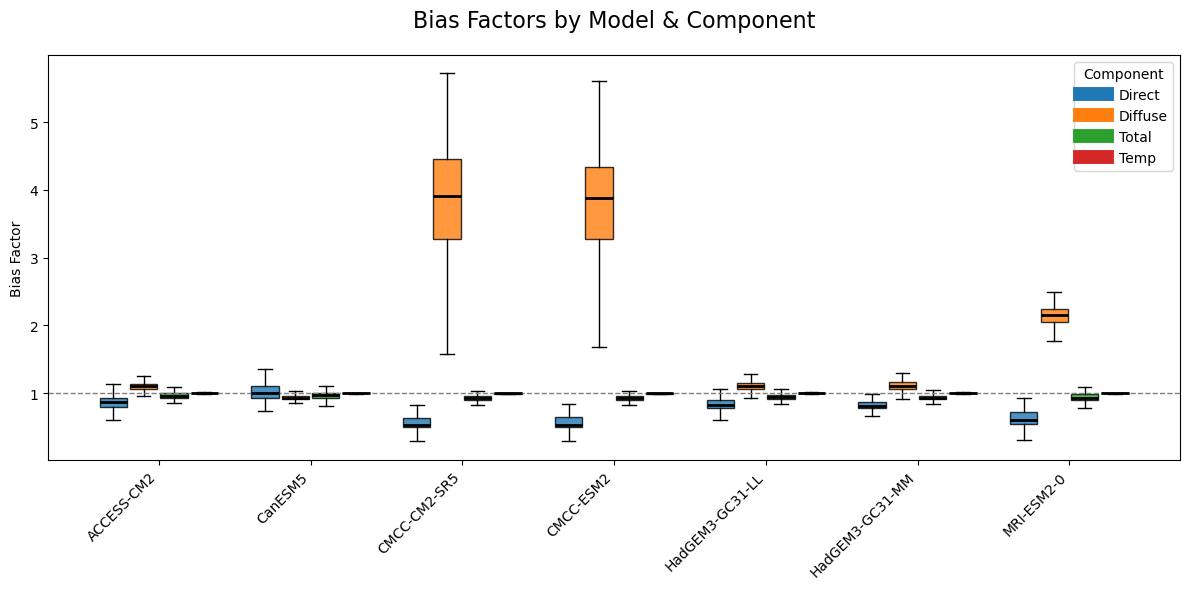

In [12]:
import os, glob
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ─── 1) SETTINGS ────────────────────────────────────────────────────
base_dir  = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors"
variables = ["direct", "diffuse", "total", "temp"]

# Order models by increasing grid resolution (smallest cell → largest)
models_res = [
    "HadGEM3-GC31-MM (100km)",
    "MRI-ESM2-0 (100km)",
    "CMCC-ESM2 (100km)",
    "CMCC-CM2-SR5 (100km)",
    "ACCESS-CM2 (250km)",
    "HadGEM3-GC31-LL (250km)",
    "CanESM5 (500km)"
]
models = [
    "ACCESS-CM2", "CanESM5", "CMCC-CM2-SR5", "CMCC-ESM2",
    "HadGEM3-GC31-LL", "HadGEM3-GC31-MM", "MRI-ESM2-0"
]

# pick three distinct colors, one per variable
var_colors = {
    "direct":  "#1f77b4",  # muted blue
    "diffuse": "#ff7f0e",  # orange
    "total":   "#2ca02c",  # green
    "temp": "#d62728"  # red
}

# ─── 2) READ & MELT ───────────────────────────────────────────────────
records = []
for var in variables:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_*.nc")
    for fpath in glob.glob(pattern):
        fname = os.path.basename(fpath)
        model = fname.split(f"{var}_bias_factor_")[1].replace(".nc","")
        ds    = xr.open_dataset(fpath)
        arr   = ds["bias_factor"].values.ravel()
        arr   = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "model":       model,
            "variable":    var,
            "bias_factor": arr
        }))
print(records)
df = pd.concat(records, ignore_index=True)
df["model"] = pd.Categorical(df["model"], categories=models, ordered=True)

# ─── 3) PREPARE DATA ARRAYS ───────────────────────────────────────────
# for each variable, build a list of arrays (one per model)
data = {
    var: [ df[(df.model==m)&(df.variable==var)]["bias_factor"].values
           for m in models ]
    for var in variables
}

# ─── 4) PLOT GROUPED BOXES ───────────────────────────────────────────
n_models = len(models)
x = np.arange(n_models)             # center positions for each model
width = 0.2                       # half‐width of each box group

fig, ax = plt.subplots(figsize=(12,6))

offsets = {
    "direct":      -1.5 * width,  # leftmost
    "diffuse":     -0.5 * width,  # second left
    "total":       +0.5 * width,  # second right
    "temp": +1.5 * width   # rightmost
}

bp_containers = {}
for var in variables:
    pos = x + offsets[var]
    bp = ax.boxplot(
        data[var],
        positions=pos,
        widths=width*0.9,
        patch_artist=True,
        showfliers=False,
        manage_ticks=False
    )
    # color the boxes & medians
    for box in bp["boxes"]:
        box.set(facecolor=var_colors[var], edgecolor="black", alpha=0.8)
    for med in bp["medians"]:
        med.set(color="k", linewidth=2)
    bp_containers[var] = bp

# ─── 5) FINISHING TOUCHES ────────────────────────────────────────────
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.set_ylabel("Bias Factor")
ax.set_title("Bias Factors by Model & Component", fontsize=16, pad=20)

# reference line at 1.0
ax.axhline(1.0, color="gray", linestyle="--", linewidth=1)

# build a custom legend
handles = [
    plt.Line2D([0], [0], color=var_colors[v], lw=10, label=v.capitalize())
    for v in variables
]
ax.legend(
    handles=handles,
    title="Component",
    loc="upper right",
    frameon=True
)

plt.tight_layout()
plt.show()


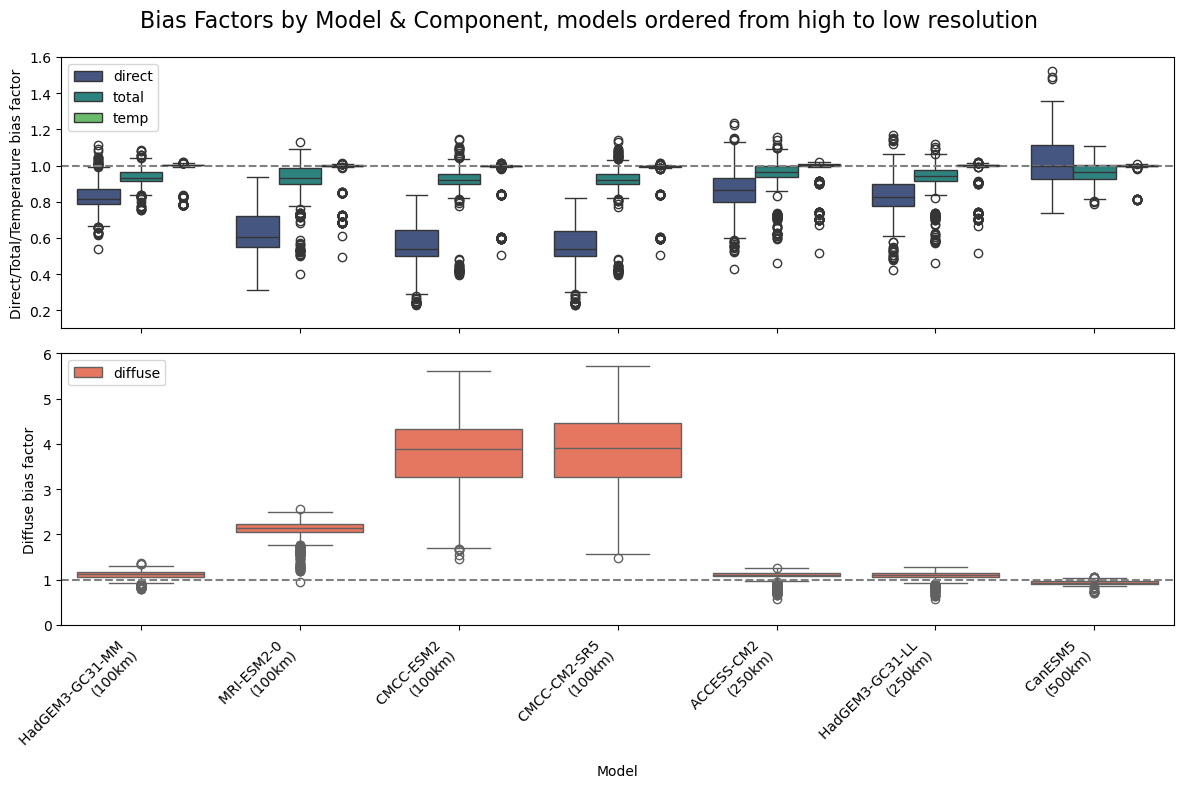

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Define the mapping for models with resolutions
model_mapping = {
    "HadGEM3-GC31-MM": "HadGEM3-GC31-MM \n(100km)",
    "MRI-ESM2-0": "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2": "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5": "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2": "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL": "HadGEM3-GC31-LL \n(250km)",
    "CanESM5": "CanESM5 \n(500km)"
}

# Map the model column to the corresponding resolution labels
df['model_res'] = df['model'].map(model_mapping)

# Define the order of models from lower to higher resolution
model_order = [
    "HadGEM3-GC31-MM \n(100km)",
    "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL \n(250km)",
    "CanESM5 \n(500km)"
]

# Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# Top: direct & total
sns.boxplot(data=df[df.variable.isin(['direct', 'total', "temp"])], 
            x='model_res', y='bias_factor', hue='variable', 
            palette='viridis', ax=ax1, order=model_order) 
ax1.set_ylim(0.1, 1.6) 
ax1.axhline(1, ls='--', c='gray') 
ax1.set_ylabel("Direct/Total/Temperature bias factor") 
ax1.legend(loc='upper left')

# Bottom: diffuse
sns.boxplot(data=df[df.variable == 'diffuse'], 
            x='model_res', y='bias_factor', hue='variable', 
            palette='Reds', ax=ax2, order=model_order) 
ax2.set_ylim(0, 6) 
ax2.axhline(1, ls='--', c='gray') 
ax2.set_ylabel("Diffuse bias factor") 
ax2.set_xlabel("Model") 
ax2.legend(loc='upper left')

# Add title and adjust layout
fig.suptitle("Bias Factors by Model & Component, models ordered from high to low resolution", fontsize=16) 
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.subplots_adjust(top=0.92) 
plt.show()
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/bf_models_era5_zoom", bbox_inches='tight', dpi=300)

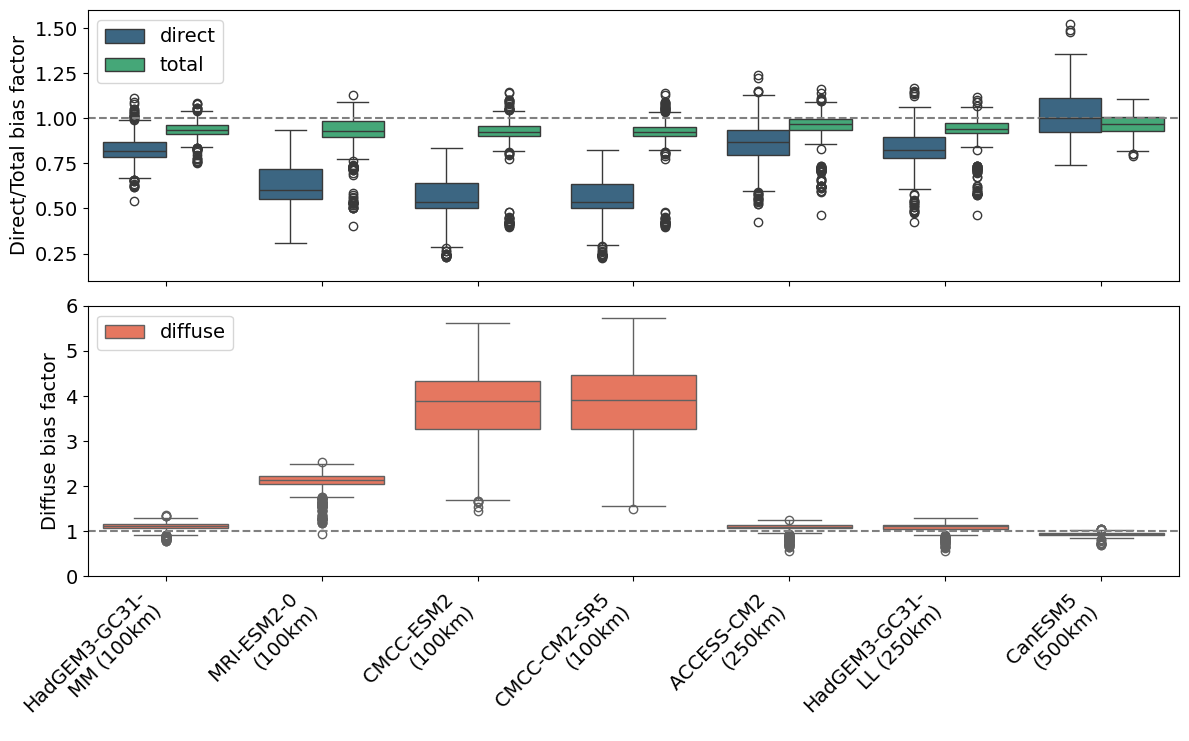

In [74]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Define the mapping for models with resolutions
model_mapping = {
    "HadGEM3-GC31-MM": "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0": "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2": "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5": "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2": "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL": "HadGEM3-GC31-\nLL (250km)",
    "CanESM5": "CanESM5 \n(500km)"
}

# Map the model column to the corresponding resolution labels
df['model_res'] = df['model'].map(model_mapping)

# Define the order of models from lower to higher resolution
model_order = [
    "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-\nLL (250km)",
    "CanESM5 \n(500km)"
]

# Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# Top: direct & total
sns.boxplot(data=df[df.variable.isin(['direct', 'total'])], 
            x='model_res', y='bias_factor', hue='variable', 
            palette='viridis', ax=ax1, order=model_order) 
ax1.set_ylim(0.1, 1.6) 
ax1.axhline(1, ls='--', c='gray') 
ax1.set_ylabel("Direct/Total bias factor", fontsize=14) 
ax1.legend(loc='upper left', fontsize=14, title_fontsize=14)

# Bottom: diffuse
sns.boxplot(data=df[df.variable == 'diffuse'], 
            x='model_res', y='bias_factor', hue='variable', 
            palette='Reds', ax=ax2, order=model_order) 
ax2.set_ylim(0, 6) 
ax2.axhline(1, ls='--', c='gray') 
ax2.set_ylabel("Diffuse bias factor", fontsize=14) 
#ax2.set_xlabel("Model", fontsize=18) 
ax2.legend(loc='upper left', fontsize=14, title_fontsize=14)
ax2.set_xlabel("") 

# Add title and adjust layout
#fig.suptitle("Bias Factors by Model & Component, models ordered from high to low resolution", fontsize=18) 
plt.xticks(rotation=45, ha='right', fontsize=14) 
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
plt.tight_layout() 
plt.subplots_adjust(top=0.92) 
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/bf_models_era5_zoom.pdf", bbox_inches='tight', dpi=300)
plt.show()


In [42]:
print(df['model'].unique())

['CMCC-ESM2', 'CMCC-CM2-SR5', 'HadGEM3-GC31-LL', 'CanESM5', 'MRI-ESM2-0', 'HadGEM3-GC31-MM', 'ACCESS-CM2']
Categories (7, object): ['ACCESS-CM2' < 'CanESM5' < 'CMCC-CM2-SR5' < 'CMCC-ESM2' < 'HadGEM3-GC31-LL' < 'HadGEM3-GC31-MM' < 'MRI-ESM2-0']


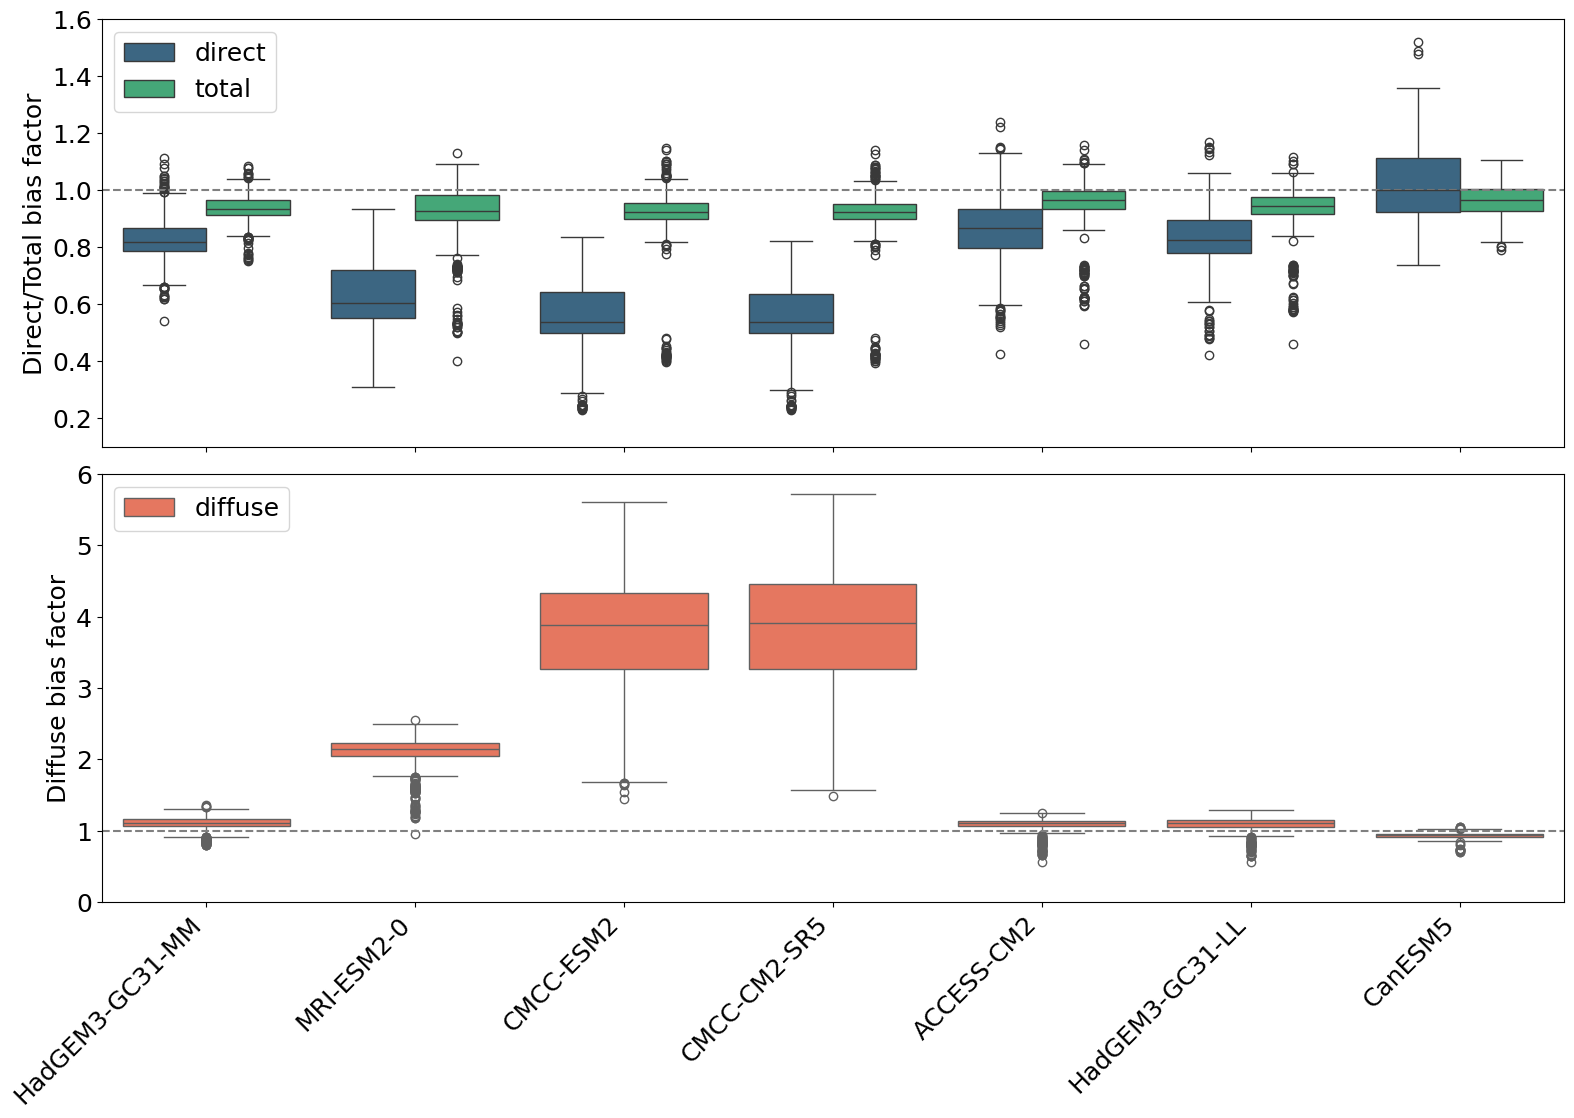

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Define the order of models from lower to higher resolution
model_order = [
    "HadGEM3-GC31-MM",
    "MRI-ESM2-0",
    "CMCC-ESM2",
    "CMCC-CM2-SR5",
    "ACCESS-CM2",
    "HadGEM3-GC31-LL",
    "CanESM5"
]

# Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# Top: direct & total
sns.boxplot(data=df[df.variable.isin(['direct', 'total'])], 
            x='model', y='bias_factor', hue='variable', 
            palette='viridis', ax=ax1, order=model_order) 
ax1.set_ylim(0.1, 1.6) 
ax1.axhline(1, ls='--', c='gray') 
ax1.set_ylabel("Direct/Total bias factor", fontsize=18) 
ax1.legend(loc='upper left', fontsize=18, title_fontsize=18)

# Bottom: diffuse
sns.boxplot(data=df[df.variable == 'diffuse'], 
            x='model', y='bias_factor', hue='variable', 
            palette='Reds', ax=ax2, order=model_order) 
ax2.set_ylim(0, 6) 
ax2.axhline(1, ls='--', c='gray') 
ax2.set_ylabel("Diffuse bias factor", fontsize=18) 
ax2.set_xlabel("", fontsize=18) 
ax2.legend(loc='upper left', fontsize=18, title_fontsize=18)

# Add title and adjust layout
#fig.suptitle("Bias Factors by Model & Component, models ordered from high to low resolution", fontsize=18) 
plt.xticks(rotation=45, ha='right', fontsize=18) 
ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
plt.tight_layout() 
plt.subplots_adjust(top=0.92) 
plt.show()
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/bf_models_era5_zoom.pdf", bbox_inches='tight', dpi=300)

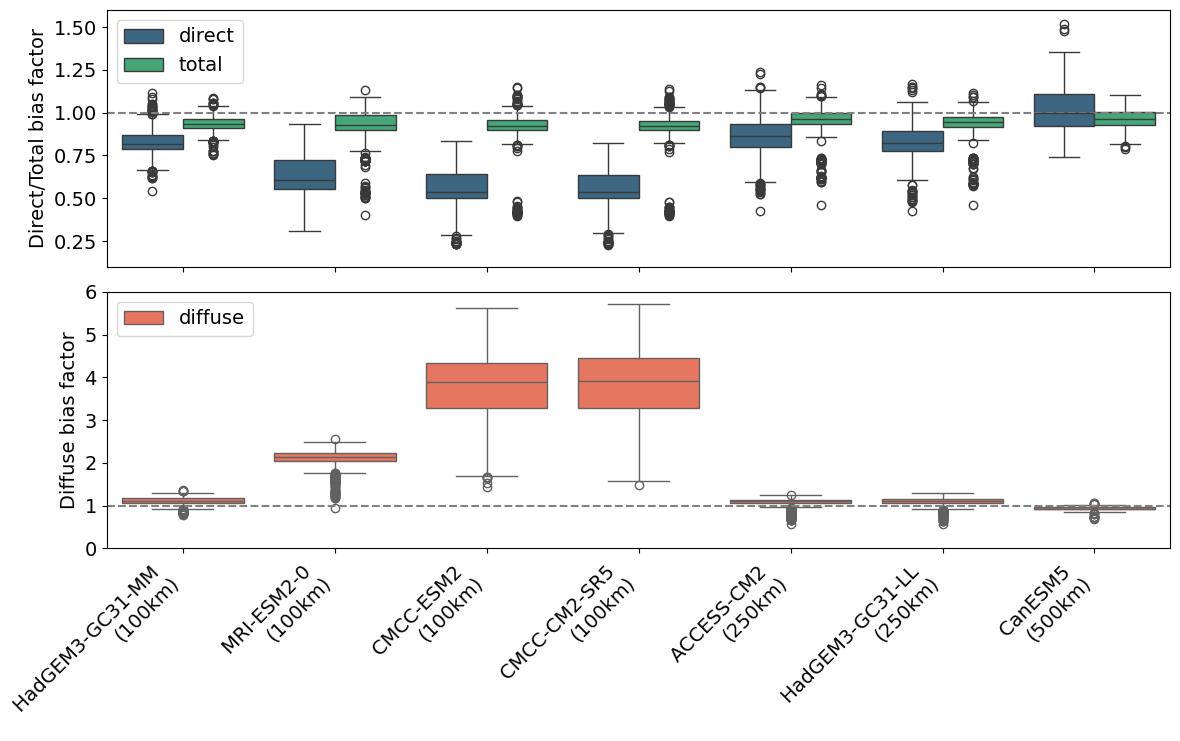

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Define the mapping for models with resolutions
model_mapping = {
    "HadGEM3-GC31-MM": "HadGEM3-GC31-MM \n(100km)",
    "MRI-ESM2-0": "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2": "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5": "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2": "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL": "HadGEM3-GC31-LL \n(250km)",
    "CanESM5": "CanESM5 \n(500km)"
}

# Map the model column to the corresponding resolution labels
df['model_res'] = df['model'].map(model_mapping)

# Define the order of models from lower to higher resolution
model_order = [
    "HadGEM3-GC31-MM \n(100km)",
    "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL \n(250km)",
    "CanESM5 \n(500km)"
]

# Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# Top: direct & total
sns.boxplot(data=df[df.variable.isin(['direct', 'total'])], 
            x='model_res', y='bias_factor', hue='variable', 
            palette='viridis', ax=ax1, order=model_order) 
ax1.set_ylim(0.1, 1.6) 
ax1.axhline(1, ls='--', c='gray') 
ax1.set_ylabel("Direct/Total bias factor", fontsize=14)  # Reduced font size
ax1.legend(loc='upper left', fontsize=14, title_fontsize=14)  # Reduced font size

# Bottom: diffuse
sns.boxplot(data=df[df.variable == 'diffuse'], 
            x='model_res', y='bias_factor', hue='variable', 
            palette='Reds', ax=ax2, order=model_order) 
ax2.set_ylim(0, 6) 
ax2.axhline(1, ls='--', c='gray') 
ax2.set_ylabel("Diffuse bias factor", fontsize=14)  # Reduced font size
ax2.legend(loc='upper left', fontsize=14, title_fontsize=14)  # Reduced font size

# Remove x-axis title
ax2.set_xlabel("")  # Clears the x-axis label

# Add title and adjust layout
plt.xticks(rotation=45, ha='right', fontsize=14)  # Reduced font size
ax1.tick_params(axis='y', labelsize=14)  # Reduced font size
ax2.tick_params(axis='y', labelsize=14)  # Reduced font size
plt.tight_layout() 
plt.subplots_adjust(top=0.92) 
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/bf_models_era5_zoom.pdf", bbox_inches='tight', dpi=300)
plt.show()



/tmp/ipykernel_108626/2272447530.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('Reds')


AttributeError: 'DataFrame' object has no attribute 'variable'

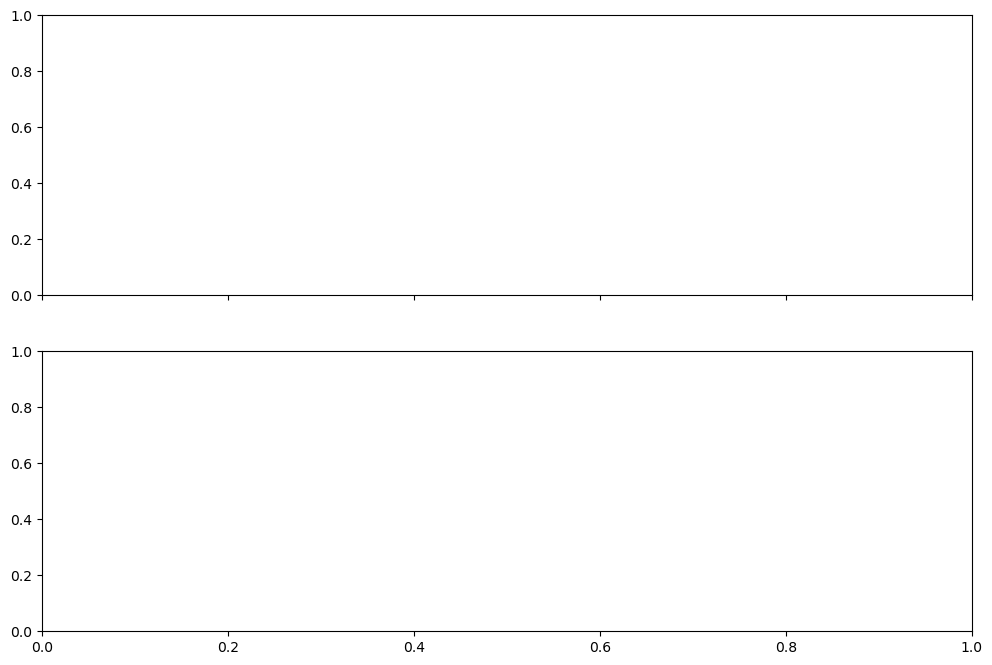

In [77]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# ─── 1) SETTINGS ─────────────────────────────────────────────────────
base_dir = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors"

# ERA5 only has influx_direct & influx_diffuse
variables_era5 = ["influx_direct", "influx_diffuse"]
# Models have direct, diffuse, and total
variables_model = ["direct", "diffuse", "total"]

# mapping raw model → label_with_resolution
model_labels = {
    "ERA5":                "ERA5 (33km)", 
    "HadGEM3-GC31-MM":     "HadGEM3-GC31\n-MM(100km)",
    "MRI-ESM2-0":          "MRI-ESM2-0\n(100km)",
    "CMCC-ESM2":           "CMCC-ESM2\n(100km)",
    "CMCC-CM2-SR5":        "CMCC-CM2-SR5\n(100km)",
    "ACCESS-CM2":          "ACCESS-CM2\n(250km)",
    "HadGEM3-GC31-LL":     "HadGEM3-GC31-\nLL(250km)",
    "CanESM5":             "CanESM5\n(500km)",
}

# desired x‐order of those labels
model_order = [
    "ERA5 (33km)",
    "HadGEM3-GC31\n-MM(100km)",
    "MRI-ESM2-0\n(100km)",
    "CMCC-ESM2\n(100km)",
    "CMCC-CM2-SR5\n(100km)",
    "ACCESS-CM2\n(250km)",
    "HadGEM3-GC31-\nLL(250km)",
    "CanESM5\n(500km)"
]
from matplotlib.cm import get_cmap
viridis = get_cmap('Reds')
red_from_viridis = viridis(0.5) 
red_hex = '#{:02x}{:02x}{:02x}'.format(int(red_from_viridis[0] * 255),
                                       int(red_from_viridis[1] * 255),
                                       int(red_from_viridis[2] * 255))
palette = {
    "Direct":  "#1f77b4",  # blue
    "Diffuse": red_hex,  # red
    "Total":   "#2ca02c",  # green
}

records = []

# 1a) ERA5 (obs)
for var in variables_era5:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_Era5.nc")
    for fpath in glob.glob(pattern):
        ds  = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      "ERA5",
            "Component":  var.replace("influx_","").capitalize(),
            "BiasFactor": arr
        }))

# 1b) Models
for var in variables_model:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_*.nc")
    for fpath in glob.glob(pattern):
        model = os.path.basename(fpath).split(f"{var}_bias_factor_")[1].replace(".nc","")
        ds    = xr.open_dataset(fpath)
        arr   = ds["bias_factor"].values.ravel()
        arr   = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      model,
            "Component":  var.capitalize(),
            "BiasFactor": arr
        }))

df = pd.concat(records, ignore_index=True)

# map raw names → labels with resolution
df["ModelLabel"] = df["Model"].map(model_labels)

# make it categorical in the desired order
df["ModelLabel"] = pd.Categorical(df["ModelLabel"],
                                  categories=model_order,
                                  ordered=True)


# Define the mapping for models with resolutions
model_mapping = {
    "HadGEM3-GC31-MM": "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0": "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2": "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5": "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2": "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL": "HadGEM3-GC31-\nLL (250km)",
    "CanESM5": "CanESM5 \n(500km)",
    "ERA5": "ERA5 \n(33km)"  # Add ERA5 mapping
}

# Map the model column to the corresponding resolution labels
df['model_res'] = df['Model'].map(model_mapping)

# Define the order of models from lower to higher resolution
model_order = [
    "ERA5 \n(33km)",  # Include ERA5 in the order
    "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-\nLL (250km)",
    "CanESM5 \n(500km)"
]

# Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# Top: direct & total
sns.boxplot(data=df[df.variable.isin(['direct', 'total'])], 
            x='model_res', y='bias_factor', hue='variable', 
            palette='viridis', ax=ax1, order=model_order) 
ax1.set_ylim(0.1, 1.6) 
ax1.axhline(1, ls='--', c='gray') 
ax1.set_ylabel("Direct/Total bias factor", fontsize=14) 
ax1.legend(loc='upper left', fontsize=14, title_fontsize=14)

# Bottom: diffuse
sns.boxplot(data=df[df.variable == 'diffuse'], 
            x='model_res', y='bias_factor', hue='variable', 
            palette='Reds', ax=ax2, order=model_order) 
ax2.set_ylim(0, 6) 
ax2.axhline(1, ls='--', c='gray') 
ax2.set_ylabel("Diffuse bias factor", fontsize=14) 
ax2.legend(loc='upper left', fontsize=14, title_fontsize=14)
ax2.set_xlabel("") 

# Add title and adjust layout
#fig.suptitle("Bias Factors by Model & Component, models ordered from high to low resolution", fontsize=18) 
plt.xticks(rotation=45, ha='right', fontsize=14) 
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
plt.tight_layout() 
plt.subplots_adjust(top=0.92) 
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/bf_models_era5_zoom.pdf", bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipykernel_108626/2686133224.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('Reds')


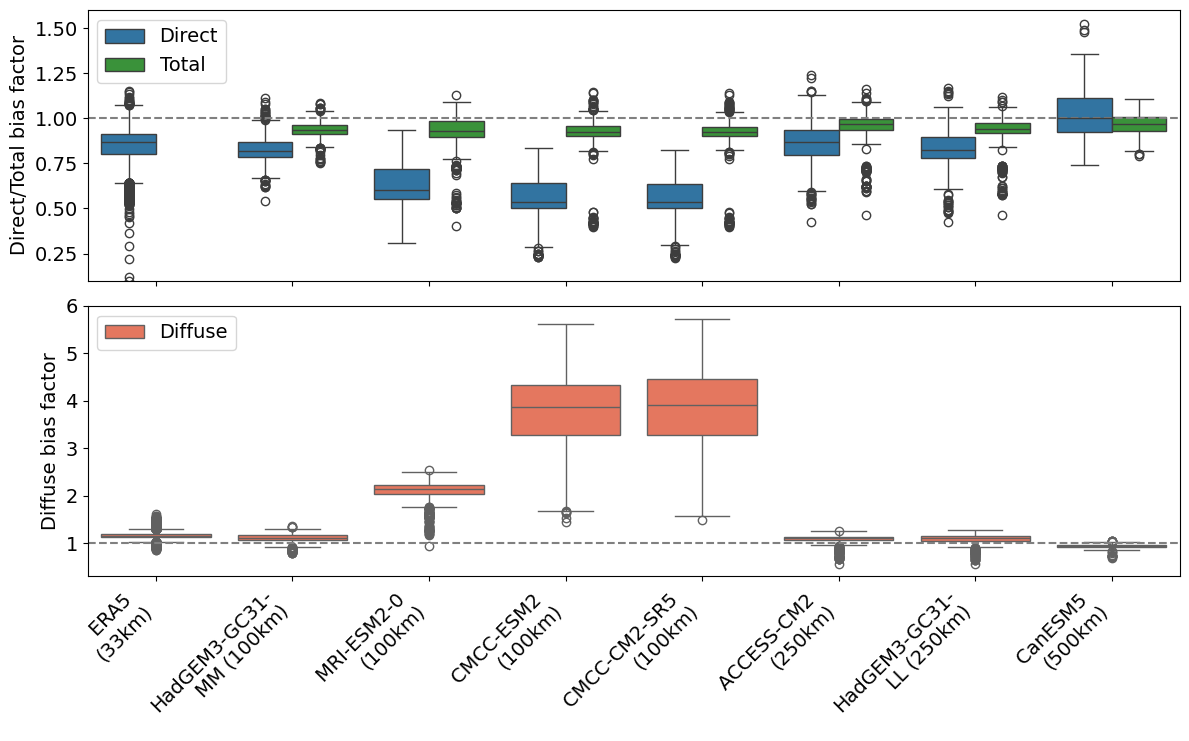

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import xarray as xr
import pandas as pd
import numpy as np

# ─── 1) SETTINGS ─────────────────────────────────────────────────────
base_dir = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors"

# ERA5 only has influx_direct & influx_diffuse
variables_era5 = ["influx_direct", "influx_diffuse"]
# Models have direct, diffuse, and total
variables_model = ["direct", "diffuse", "total"]

# Mapping raw model → label_with_resolution
model_labels = {
    "ERA5":                "ERA5 \n(33km)", 
    "HadGEM3-GC31-MM":     "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0":          "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2":           "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5":        "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2":          "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL":     "HadGEM3-GC31-\nLL (250km)",
    "CanESM5":             "CanESM5 \n(500km)",
}

# Desired x‐order of those labels
model_order = [
    "ERA5 \n(33km)",
    "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-\nLL (250km)",
    "CanESM5 \n(500km)"
]

from matplotlib.cm import get_cmap
viridis = get_cmap('Reds')
red_from_viridis = viridis(0.5) 
red_hex = '#{:02x}{:02x}{:02x}'.format(int(red_from_viridis[0] * 255),
                                       int(red_from_viridis[1] * 255),
                                       int(red_from_viridis[2] * 255))
palette = {
    "Direct":  "#1f77b4",  # blue
    "Diffuse": red_hex,  # red
    "Total":   "#2ca02c",  # green
}

# ─── 2) READ & MELT ───────────────────────────────────────────────────
records = []

# 2a) ERA5 (obs)
for var in variables_era5:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_Era5.nc")
    for fpath in glob.glob(pattern):
        ds = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      "ERA5",
            "Variable":   var.replace("influx_", "").capitalize(),
            "BiasFactor": arr
        }))

# 2b) Models
for var in variables_model:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_*.nc")
    for fpath in glob.glob(pattern):
        model = os.path.basename(fpath).split(f"{var}_bias_factor_")[1].replace(".nc", "")
        ds = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      model,
            "Variable":   var.capitalize(),
            "BiasFactor": arr
        }))

df = pd.concat(records, ignore_index=True)

# Map raw names → labels with resolution
df["ModelLabel"] = df["Model"].map(model_labels)

# Make it categorical in the desired order
df["ModelLabel"] = pd.Categorical(df["ModelLabel"], categories=model_order, ordered=True)

# ─── 3) PLOT ────────────────────────────────────────────────────────
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# Top: direct & total
sns.boxplot(data=df[df.Variable.isin(["Direct", "Total"])], 
            x="ModelLabel", y="BiasFactor", hue="Variable", 
            palette=["#1f77b4", "#2ca02c"], ax=ax1, order=model_order)
ax1.set_ylim(0.1, 1.6)
ax1.axhline(1, ls="--", c="gray")
ax1.set_ylabel("Direct/Total bias factor", fontsize=14)
ax1.legend(loc="upper left", fontsize=14, title_fontsize=14)

# Bottom: diffuse
sns.boxplot(data=df[df.Variable == "Diffuse"], 
            x="ModelLabel", y="BiasFactor", hue="Variable", 
            palette=[red_hex], ax=ax2, order=model_order)
ax2.set_ylim(0.3, 6)
ax2.axhline(1, ls="--", c="gray")
ax2.set_ylabel("Diffuse bias factor", fontsize=14)
ax2.legend(loc="upper left", fontsize=14, title_fontsize=14)
ax2.set_xlabel("")

# Add title and adjust layout
plt.xticks(rotation=45, ha="right", fontsize=14)
ax1.tick_params(axis="y", labelsize=14)
ax2.tick_params(axis="y", labelsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/bf_models_era5_zoom.pdf", bbox_inches="tight", dpi=300)
plt.show()

/tmp/ipykernel_7052/3767650896.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('Reds')


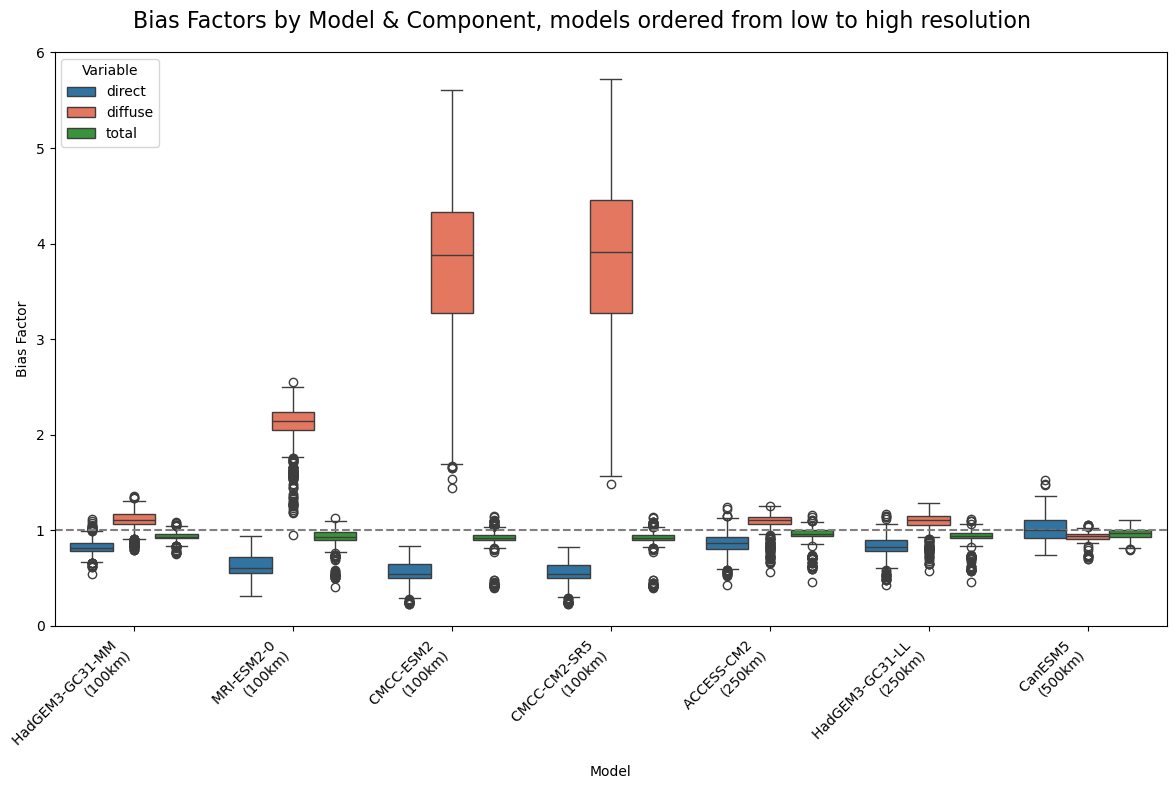

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap
model_mapping = {
    "HadGEM3-GC31-MM": "HadGEM3-GC31-MM \n(100km)",
    "MRI-ESM2-0": "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2": "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5": "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2": "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL": "HadGEM3-GC31-LL \n(250km)",
    "CanESM5": "CanESM5 \n(500km)"
}

# Map the model column to the corresponding resolution labels
df['model_res'] = df['model'].map(model_mapping)

# Define the order of models from lower to higher resolution
model_order = [
    "HadGEM3-GC31-MM \n(100km)",
    "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL \n(250km)",
    "CanESM5 \n(500km)"
]
viridis = get_cmap('Reds')
red_from_viridis = viridis(0.5) 
red_hex = '#{:02x}{:02x}{:02x}'.format(int(red_from_viridis[0] * 255),
                                       int(red_from_viridis[1] * 255),
                                       int(red_from_viridis[2] * 255))
# Define custom palette for all variables
palette = {'direct': '#1f77b4', 'total': '#2ca02c', 'diffuse': red_hex}  # Blue, orange, green

fig, ax = plt.subplots(figsize=(12, 8))

# Unified plot for all variables
sns.boxplot(data=df,
            x='model_res', y='bias_factor', hue='variable',
            palette=palette,  # Apply custom palette
            ax=ax, order=model_order)

# Adjust y-axis to ensure all details are visible
ax.set_ylim(0, df['bias_factor'].max() * 1.05)  # Add 10% padding above the max value
ax.axhline(1, ls='--', c='gray')  # Reference line at 1
ax.set_ylabel("Bias Factor")
ax.set_xlabel("Model")
ax.legend(title="Variable", loc='upper left')

# Add title and adjust layout
fig.suptitle("Bias Factors by Model & Component, models ordered from low to high resolution", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_108626/4193383753.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('Reds')
/tmp/ipykernel_108626/4193383753.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


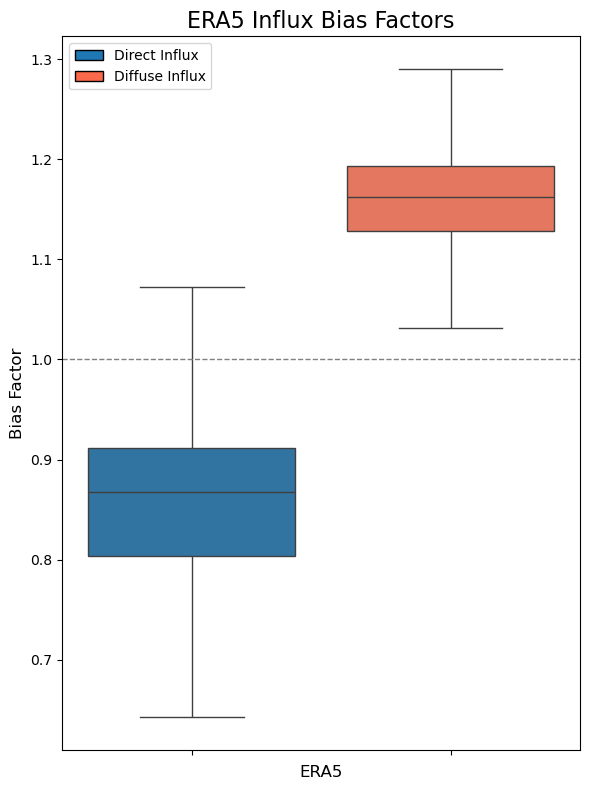

In [ ]:
import os
import glob
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap

# ─── 1) SETTINGS ────────────────────────────────────────────────────
base_dir  = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors"
variables = ["influx_direct", "influx_diffuse"]

# Pick two distinct colors, one per variable
viridis = get_cmap('Reds')
red_from_viridis = viridis(0.5) 
red_hex = '#{:02x}{:02x}{:02x}'.format(int(red_from_viridis[0] * 255),
                                       int(red_from_viridis[1] * 255),
                                       int(red_from_viridis[2] * 255))
var_colors = {
    "influx_direct":  "#1f77b4",  # muted blue
    "influx_diffuse": red_hex     # red from viridis
}

# ─── 2) READ & MELT ───────────────────────────────────────────────────
records = []
for var in variables:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_*.nc")
    for fpath in glob.glob(pattern):
        ds  = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        # Build a small DataFrame for this variable
        records.append(pd.DataFrame({
            "variable":    var,
            "bias_factor": arr
        }))
# Concatenate into one DataFrame
df = pd.concat(records, ignore_index=True)

# ─── 3) PLOT ─────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(6, 8))

sns.boxplot(
    data=df,
    x="variable",
    y="bias_factor",
    palette=var_colors,
    ax=ax,
    showfliers=False  # Hide outliers for clarity, if you like
)

# Cleanup
ax.set_ylabel("Bias Factor", fontsize=12)
ax.set_xlabel("ERA5", fontsize=12)  # Single x-axis title
ax.set_title("ERA5 Influx Bias Factors", fontsize=16)
ax.axhline(1.0, color="gray", linestyle="--", linewidth=1)
ax.set_xticklabels([])

import matplotlib.patches as mpatches
handles = [
    mpatches.Patch(facecolor=var_colors["influx_direct"], edgecolor="black", label="Direct Influx"),
    mpatches.Patch(facecolor=var_colors["influx_diffuse"], edgecolor="black", label="Diffuse Influx"),
]
ax.legend(handles=handles, loc="upper left", frameon=True)

plt.tight_layout()
plt.show()

In [ ]:
import os
import glob
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap

# ─── 1) SETTINGS ────────────────────────────────────────────────────
base_dir  = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors"
variables = ["temp"]

# Pick two distinct colors, one per variable
viridis = get_cmap('Reds')
red_from_viridis = viridis(0.5) 
red_hex = '#{:02x}{:02x}{:02x}'.format(int(red_from_viridis[0] * 255),
                                       int(red_from_viridis[1] * 255),
                                       int(red_from_viridis[2] * 255))
var_colors = {
    "temp":  "#1f77b4",  # muted blue
    "influx_diffuse": red_hex     # red from viridis
}

# ─── 2) READ & MELT ───────────────────────────────────────────────────
records = []
for var in variables:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_*.nc")
    for fpath in glob.glob(pattern):
        ds  = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        # Build a small DataFrame for this variable
        records.append(pd.DataFrame({
            "variable":    var,
            "bias_factor": arr
        }))
# Concatenate into one DataFrame
df = pd.concat(records, ignore_index=True)

# ─── 3) PLOT ─────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(6, 8))

sns.boxplot(
    data=df,
    x="variable",
    y="bias_factor",
    palette=var_colors,
    ax=ax,
    showfliers=False  # Hide outliers for clarity, if you like
)

# Cleanup
ax.set_ylabel("Bias Factor", fontsize=12)
ax.set_xlabel("ERA5", fontsize=12)  # Single x-axis title
ax.set_title("ERA5 Influx Bias Factors", fontsize=16)
ax.axhline(1.0, color="gray", linestyle="--", linewidth=1)
ax.set_xticklabels([])

import matplotlib.patches as mpatches
handles = [
    mpatches.Patch(facecolor=var_colors["influx_direct"], edgecolor="black", label="Direct Influx"),
    mpatches.Patch(facecolor=var_colors["influx_diffuse"], edgecolor="black", label="Diffuse Influx"),
]
ax.legend(handles=handles, loc="upper left", frameon=True)

plt.tight_layout()
plt.show()

/tmp/ipykernel_108626/3499519734.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('Reds')


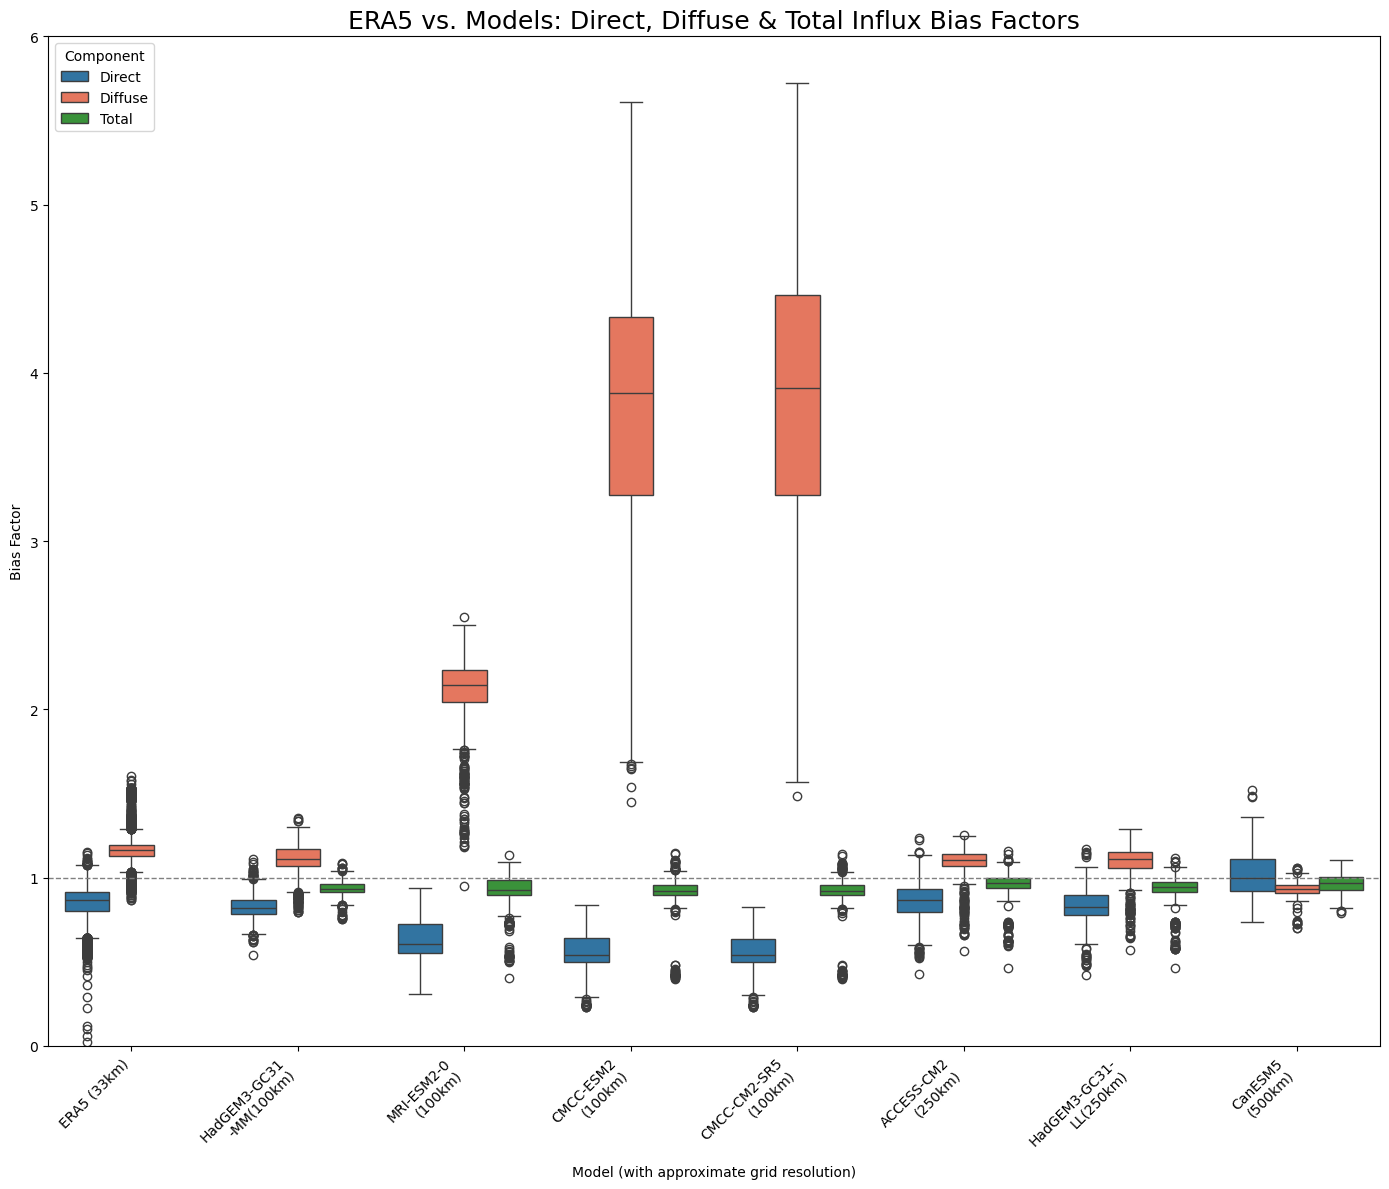

In [58]:
import os, glob
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ─── 1) SETTINGS ─────────────────────────────────────────────────────
base_dir = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors"

# ERA5 only has influx_direct & influx_diffuse
variables_era5 = ["influx_direct", "influx_diffuse"]
# Models have direct, diffuse, and total
variables_model = ["direct", "diffuse", "total"]

# mapping raw model → label_with_resolution
model_labels = {
    "ERA5":                "ERA5 (33km)", 
    "HadGEM3-GC31-MM":     "HadGEM3-GC31\n-MM(100km)",
    "MRI-ESM2-0":          "MRI-ESM2-0\n(100km)",
    "CMCC-ESM2":           "CMCC-ESM2\n(100km)",
    "CMCC-CM2-SR5":        "CMCC-CM2-SR5\n(100km)",
    "ACCESS-CM2":          "ACCESS-CM2\n(250km)",
    "HadGEM3-GC31-LL":     "HadGEM3-GC31-\nLL(250km)",
    "CanESM5":             "CanESM5\n(500km)",
}

# desired x‐order of those labels
model_order = [
    "ERA5 (33km)",
    "HadGEM3-GC31\n-MM(100km)",
    "MRI-ESM2-0\n(100km)",
    "CMCC-ESM2\n(100km)",
    "CMCC-CM2-SR5\n(100km)",
    "ACCESS-CM2\n(250km)",
    "HadGEM3-GC31-\nLL(250km)",
    "CanESM5\n(500km)"
]
viridis = get_cmap('Reds')
red_from_viridis = viridis(0.5) 
red_hex = '#{:02x}{:02x}{:02x}'.format(int(red_from_viridis[0] * 255),
                                       int(red_from_viridis[1] * 255),
                                       int(red_from_viridis[2] * 255))
palette = {
    "Direct":  "#1f77b4",  # blue
    "Diffuse": red_hex,  # red
    "Total":   "#2ca02c",  # green
}

records = []

# 1a) ERA5 (obs)
for var in variables_era5:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_Era5.nc")
    for fpath in glob.glob(pattern):
        ds  = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      "ERA5",
            "Component":  var.replace("influx_","").capitalize(),
            "BiasFactor": arr
        }))

# 1b) Models
for var in variables_model:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_*.nc")
    for fpath in glob.glob(pattern):
        model = os.path.basename(fpath).split(f"{var}_bias_factor_")[1].replace(".nc","")
        ds    = xr.open_dataset(fpath)
        arr   = ds["bias_factor"].values.ravel()
        arr   = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      model,
            "Component":  var.capitalize(),
            "BiasFactor": arr
        }))

df = pd.concat(records, ignore_index=True)

# map raw names → labels with resolution
df["ModelLabel"] = df["Model"].map(model_labels)

# make it categorical in the desired order
df["ModelLabel"] = pd.Categorical(df["ModelLabel"],
                                  categories=model_order,
                                  ordered=True)

# ─── 2) Plot ────────────────────────────────────────────────────────
plt.figure(figsize=(14,12))
sns.boxplot(
    data=df,
    x="ModelLabel", y="BiasFactor",
    hue="Component",
    palette=palette,
    dodge=True,
    boxprops={}        # avoids the seaborn bug
)

# styling
plt.axhline(1, color="gray", linestyle="--", linewidth=1)
plt.ylim(0, 6)
plt.title("ERA5 vs. Models: Direct, Diffuse & Total Influx Bias Factors", fontsize=18)
plt.xlabel("Model (with approximate grid resolution)")
plt.ylabel("Bias Factor")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Component", loc="upper left")
plt.tight_layout()
plt.show()


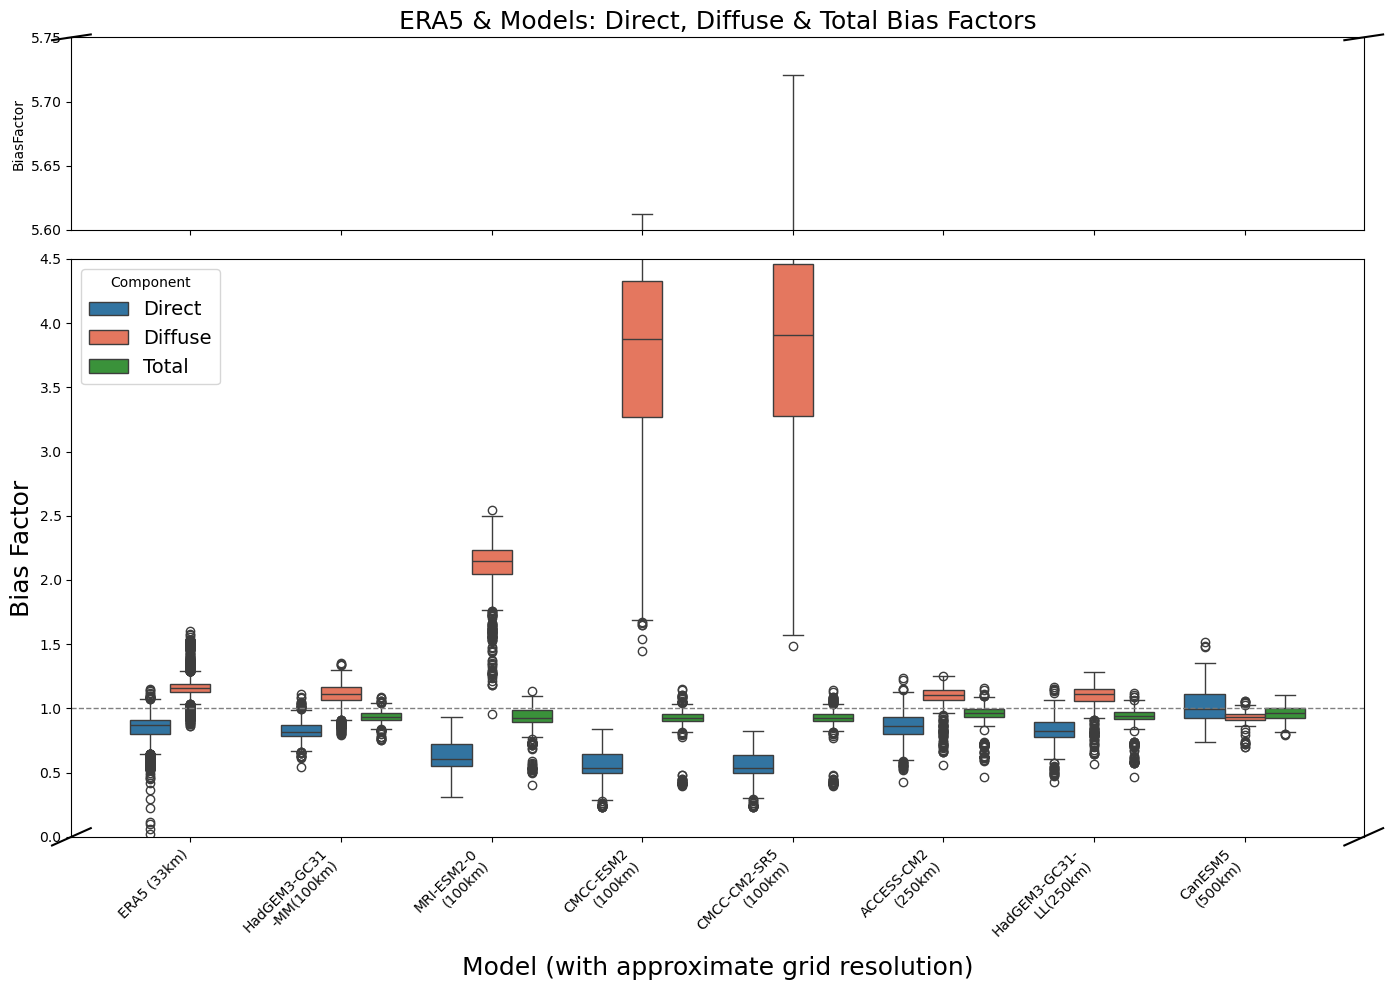

<Figure size 640x480 with 0 Axes>

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# ─── 2) Plot with Broken Y-Axis ────────────────────────────────────────
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [1, 3]})

# Bottom axis (now on top): y-axis range from 5.3 to 6
sns.boxplot(
    data=df,
    x="ModelLabel", y="BiasFactor",
    hue="Component",
    palette=palette,
    dodge=True,
    ax=ax2
)
ax2.set_ylim(5.6, 5.75)
ax2.axhline(1, color="gray", linestyle="--", linewidth=1)

# Top axis (now on bottom): y-axis range from 0 to 4.3
sns.boxplot(
    data=df,
    x="ModelLabel", y="BiasFactor",
    hue="Component",
    palette=palette,
    dodge=True,
    ax=ax1
)
ax1.set_ylim(0, 4.5)
ax1.axhline(1, color="gray", linestyle="--", linewidth=1)

# Add diagonal lines to indicate the break
d = 0.015  # Size of diagonal lines
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

# Styling
ax2.set_title("ERA5 & Models: Direct, Diffuse & Total Bias Factors", fontsize=18)
ax2.set_xlabel("")
#ax2.set_ylabel("Bias Factor", fontsize=18)
ax1.set_xlabel("Model (with approximate grid resolution)", fontsize=18)
ax1.set_ylabel("Bias Factor", fontsize=18)
ax2.legend_.remove()  # Remove duplicate legend
ax1.legend(title="Component", loc="upper left", fontsize=14)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/bf_models_era5", bbox_inches='tight', dpi=300)


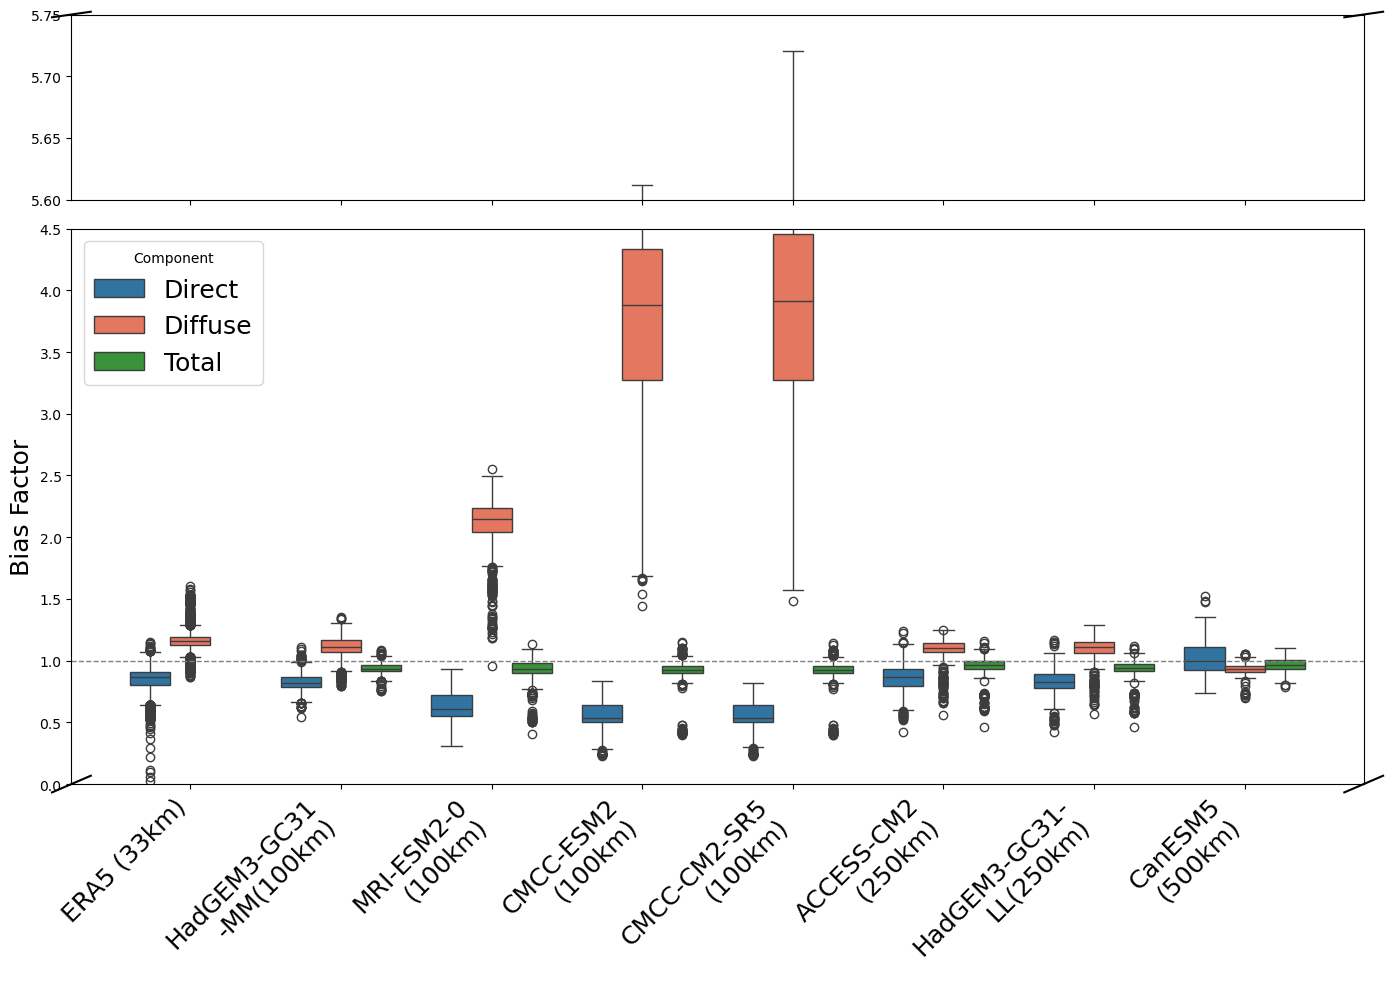

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# ─── 2) Plot with Broken Y-Axis ────────────────────────────────────────
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [1, 3]})

# Bottom axis (now on top): y-axis range from 5.3 to 6
sns.boxplot(
    data=df,
    x="ModelLabel", y="BiasFactor",
    hue="Component",
    palette=palette,
    dodge=True,
    ax=ax2
)
ax2.set_ylim(5.6, 5.75)
ax2.axhline(1, color="gray", linestyle="--", linewidth=1)

# Top axis (now on bottom): y-axis range from 0 to 4.3
sns.boxplot(
    data=df,
    x="ModelLabel", y="BiasFactor",
    hue="Component",
    palette=palette,
    dodge=True,
    ax=ax1
)
ax1.set_ylim(0, 4.5)
ax1.axhline(1, color="gray", linestyle="--", linewidth=1)

# Add diagonal lines to indicate the break
d = 0.015  # Size of diagonal lines
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

# Styling
#ax2.set_title("ERA5 & Models: Direct, Diffuse & Total Bias Factors", fontsize=18)
ax2.set_xlabel("")
ax2.set_ylabel("")  # Remove "Bias Factor" from the second y-axis
#ax1.set_xlabel("Model (with approximate grid resolution)", fontsize=18)
ax1.set_ylabel("Bias Factor", fontsize=18)
ax2.legend_.remove()  # Remove duplicate legend
ax1.legend(title="Component", loc="upper left", fontsize=18)
ax1.set_xlabel("") 
# Increase font size of x-axis labels
ax1.tick_params(axis='x', labelsize=18)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/bf_models_era5.pdf", bbox_inches='tight', dpi=300)
plt.show()


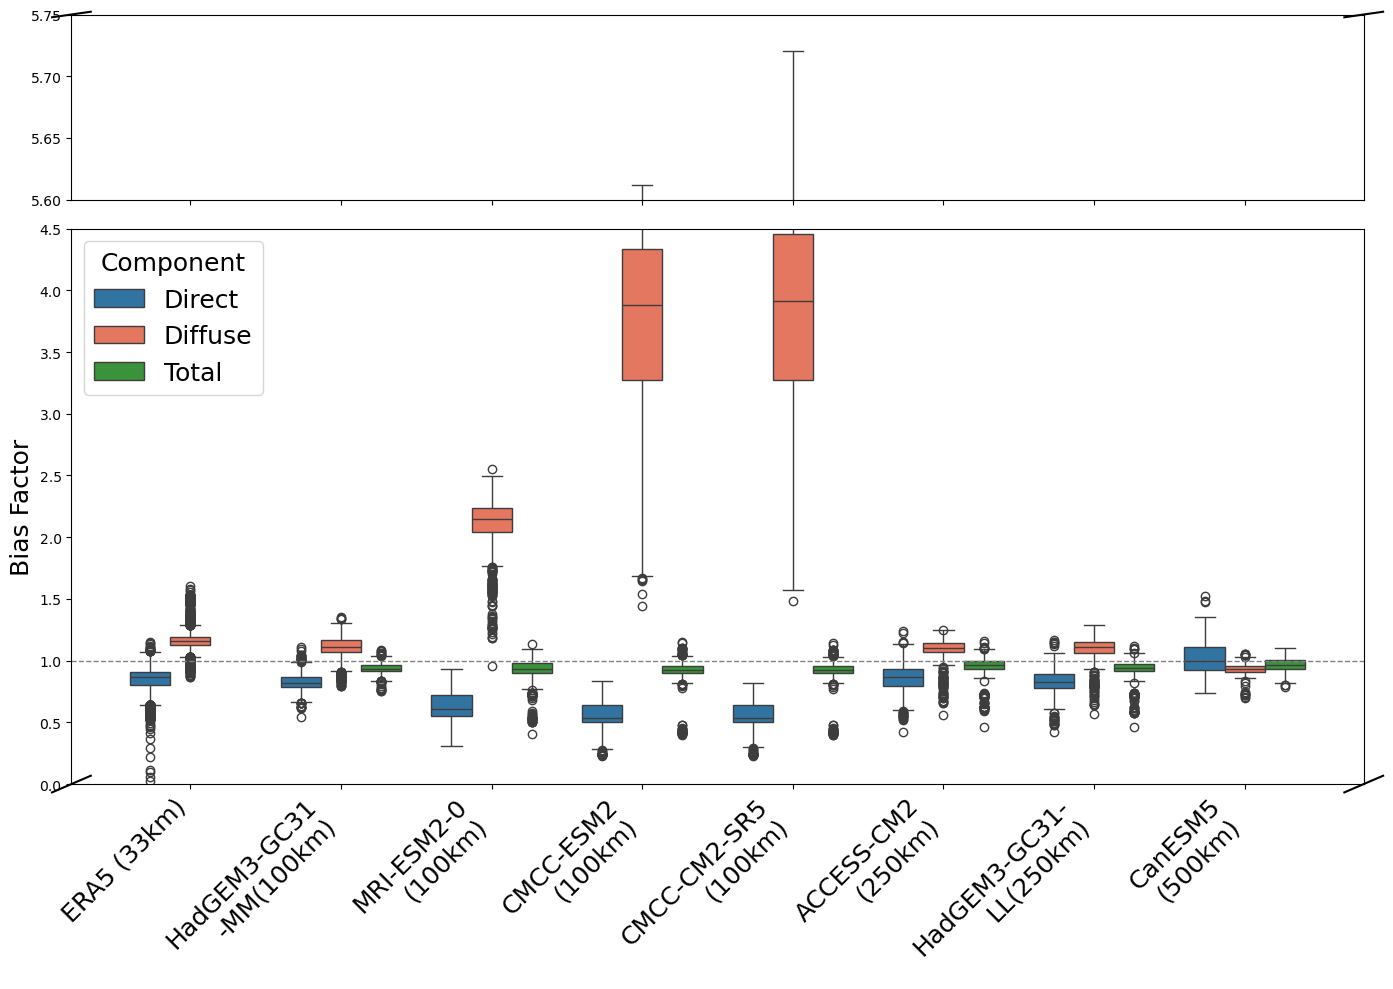

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# ─── 2) Plot with Broken Y-Axis ────────────────────────────────────────
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [1, 3]})

# Bottom axis (now on top): y-axis range from 5.3 to 6
sns.boxplot(
    data=df,
    x="ModelLabel", y="BiasFactor",
    hue="Component",
    palette=palette,
    dodge=True,
    ax=ax2
)
ax2.set_ylim(5.6, 5.75)
ax2.axhline(1, color="gray", linestyle="--", linewidth=1)

# Top axis (now on bottom): y-axis range from 0 to 4.3
sns.boxplot(
    data=df,
    x="ModelLabel", y="BiasFactor",
    hue="Component",
    palette=palette,
    dodge=True,
    ax=ax1
)
ax1.set_ylim(0, 4.5)
ax1.axhline(1, color="gray", linestyle="--", linewidth=1)

# Add diagonal lines to indicate the break
d = 0.015  # Size of diagonal lines
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

# Styling
#ax2.set_title("ERA5 & Models: Direct, Diffuse & Total Bias Factors", fontsize=18)
ax2.set_xlabel("")
ax2.set_ylabel("")  # Remove "Bias Factor" from the second y-axis
#ax1.set_xlabel("Model (with approximate grid resolution)", fontsize=18)
ax1.set_ylabel("Bias Factor", fontsize=18)
ax2.legend_.remove()  # Remove duplicate legend
ax1.legend(title="Component", loc="upper left", fontsize=18, title_fontsize=18)  # Increased title font size
ax1.set_xlabel("") 
# Increase font size of x-axis labels
ax1.tick_params(axis='x', labelsize=18)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/bf_models_era5.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [91]:
# ─── 1) SETTINGS ────────────────────────────────────────────────────
base_dir  = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors"
variables = ["direct", "diffuse", "total", "temp"]

# Order models by increasing grid resolution (smallest cell → largest)
models_res = [
    "HadGEM3-GC31-MM (100km)",
    "MRI-ESM2-0 (100km)",
    "CMCC-ESM2 (100km)",
    "CMCC-CM2-SR5 (100km)",
    "ACCESS-CM2 (250km)",
    "HadGEM3-GC31-LL (250km)",
    "CanESM5 (500km)"
]
models = [
    "ACCESS-CM2", "CanESM5", "CMCC-CM2-SR5", "CMCC-ESM2",
    "HadGEM3-GC31-LL", "HadGEM3-GC31-MM", "MRI-ESM2-0"
]

# pick three distinct colors, one per variable
var_colors = {
    "direct":  "#1f77b4",  # muted blue
    "diffuse": "#ff7f0e",  # orange
    "total":   "#2ca02c",  # green
    "temp": "#d62728"  # red
}

# ─── 2) READ & MELT ───────────────────────────────────────────────────
records = []
for var in variables:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_*.nc")
    for fpath in glob.glob(pattern):
        fname = os.path.basename(fpath)
        model = fname.split(f"{var}_bias_factor_")[1].replace(".nc","")
        ds    = xr.open_dataset(fpath)
        arr   = ds["bias_factor"].values.ravel()
        arr   = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "model":       model,
            "variable":    var,
            "bias_factor": arr
        }))
df = pd.concat(records, ignore_index=True)
df["model"] = pd.Categorical(df["model"], categories=models, ordered=True)
data = {
    var: [ df[(df.model==m)&(df.variable==var)]["bias_factor"].values
           for m in models ]
    for var in variables
}

/tmp/ipykernel_108626/373820544.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_temp,
/tmp/ipykernel_108626/373820544.py:36: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_temp,


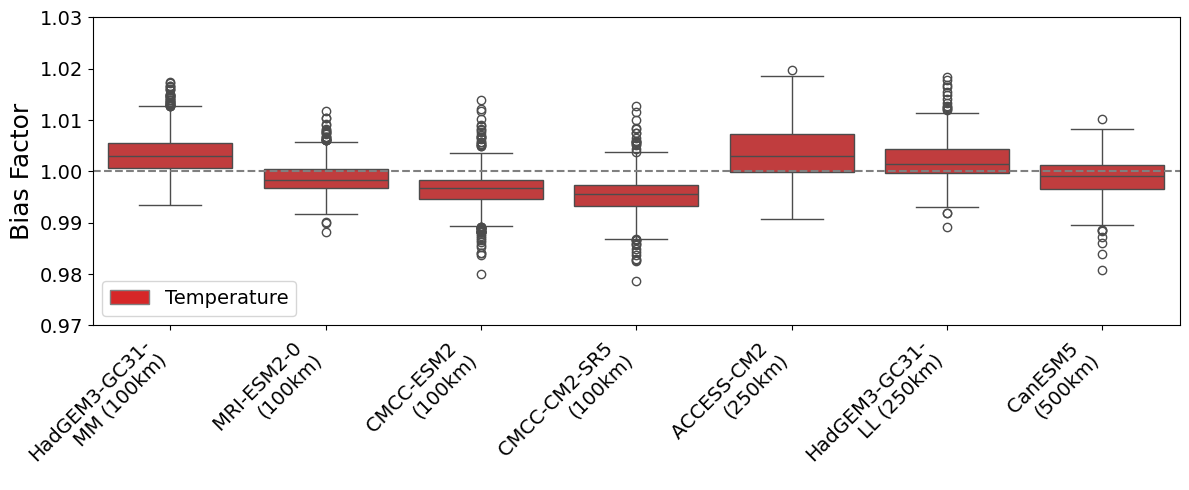

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Map the model column to the corresponding resolution labels
model_mapping = {
    "HadGEM3-GC31-MM": "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0": "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2": "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5": "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2": "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL": "HadGEM3-GC31-\nLL (250km)",
    "CanESM5": "CanESM5 \n(500km)"
}

# Create the model_res column
df['model_res'] = df['model'].map(model_mapping)

# Filter the DataFrame for the temperature variable
df_temp = df[df['variable'] == 'temp']

# Define the order of models from lower to higher resolution
model_order = [
    "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-\nLL (250km)",
    "CanESM5 \n(500km)"
]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 5))

sns.boxplot(data=df_temp,
            x='model_res', y='bias_factor',
            palette=['#d62728'],  # Red color for temperature
            ax=ax, order=model_order)

# Adjust y-axis to ensure all details are visible
ax.set_ylim(0.97, df_temp['bias_factor'].max()*1.01)  # Add 10% padding above the max value
ax.axhline(1, ls='--', c='gray')  # Reference line at 1
ax.set_ylabel("Bias Factor", fontsize=18)
ax.set_xlabel("") 
from matplotlib.patches import Patch
# Add legend for temperature
legend_label = Patch(facecolor='#d62728', edgecolor='gray', linewidth=1, label='Temperature')
ax.legend(handles=[legend_label], loc='lower left', fontsize=14)

# Adjust font size for axis ticks
ax.tick_params(axis='y', labelsize=14)  # Change font size for y-axis numbers
ax.tick_params(axis='x', labelsize=14)

# Add title and adjust layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/temp_bf.pdf", bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipykernel_108626/78730267.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('Reds')
/tmp/ipykernel_108626/78730267.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df.Variable == "Temp"],
/tmp/ipykernel_108626/78730267.py:107: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df[df.Variable == "Temp"],


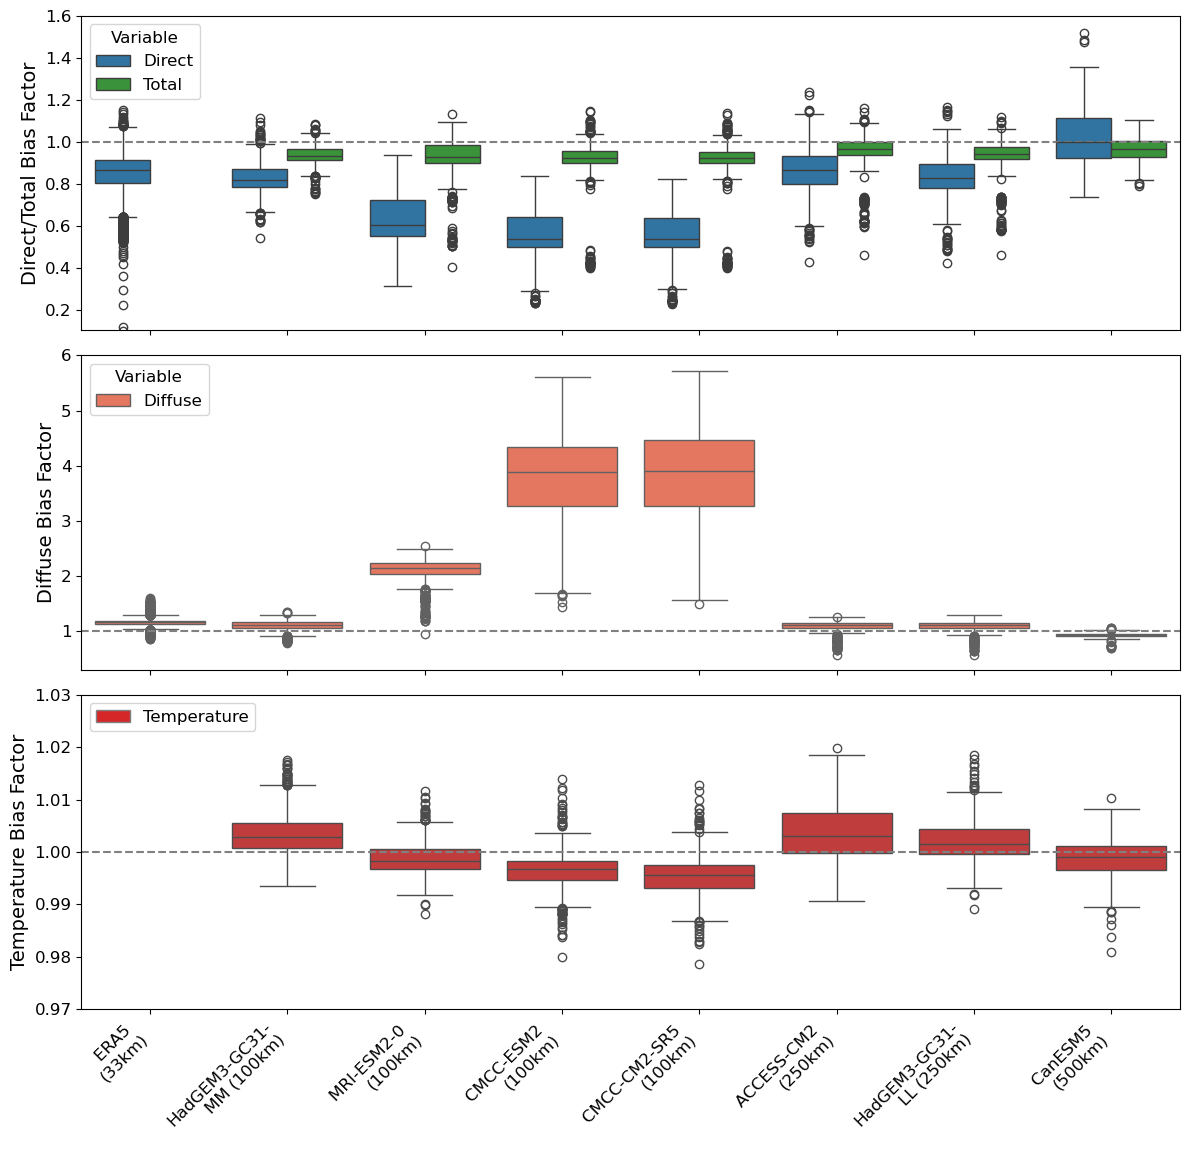

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import os
import glob
import xarray as xr
import pandas as pd
import numpy as np

# ─── SETTINGS ─────────────────────────────────────────────────────
base_dir = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors"

variables_era5 = ["influx_direct", "influx_diffuse"]
variables_model = ["direct", "diffuse", "total", "temp"]

model_labels = {
    "ERA5":                "ERA5 \n(33km)", 
    "HadGEM3-GC31-MM":     "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0":          "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2":           "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5":        "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2":          "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL":     "HadGEM3-GC31-\nLL (250km)",
    "CanESM5":             "CanESM5 \n(500km)",
}

model_order = [
    "ERA5 \n(33km)",
    "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-\nLL (250km)",
    "CanESM5 \n(500km)"
]
viridis = get_cmap('Reds')
red_from_viridis = viridis(0.5) 
red_hex = '#{:02x}{:02x}{:02x}'.format(int(red_from_viridis[0] * 255),
                                       int(red_from_viridis[1] * 255),
                                       int(red_from_viridis[2] * 255))
palette = {
    "Direct":  "#1f77b4",  # blue
    "Diffuse": red_hex,  # orange
    "Total":   "#2ca02c",  # green
    "Temperature": "#d62728"  # red
}

# ─── READ & MELT ───────────────────────────────────────────────────
records = []

# ERA5 data
for var in variables_era5:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_Era5.nc")
    for fpath in glob.glob(pattern):
        ds = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      "ERA5",
            "Variable":   var.replace("influx_", "").capitalize(),
            "BiasFactor": arr
        }))

# Model data
for var in variables_model:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_*.nc")
    for fpath in glob.glob(pattern):
        model = os.path.basename(fpath).split(f"{var}_bias_factor_")[1].replace(".nc", "")
        ds = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      model,
            "Variable":   var.capitalize(),
            "BiasFactor": arr
        }))

df = pd.concat(records, ignore_index=True)

# Map raw names → labels with resolution
df["ModelLabel"] = df["Model"].map(model_labels)
df["ModelLabel"] = pd.Categorical(df["ModelLabel"], categories=model_order, ordered=True)

# ─── PLOT ────────────────────────────────────────────────────────
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})

# Top: Direct & Total
sns.boxplot(data=df[df.Variable.isin(["Direct", "Total"])], 
            x="ModelLabel", y="BiasFactor", hue="Variable", 
            palette=["#1f77b4", "#2ca02c"], ax=ax1, order=model_order)
ax1.set_ylim(0.1, 1.6)
ax1.axhline(1, ls="--", c="gray")
ax1.set_ylabel("Direct/Total Bias Factor", fontsize=14)
ax1.legend(loc="upper left", fontsize=12, title="Variable", title_fontsize=12)

# Middle: Diffuse
sns.boxplot(data=df[df.Variable == "Diffuse"], 
            x="ModelLabel", y="BiasFactor", hue="Variable", 
            palette=[red_hex], ax=ax2, order=model_order)
ax2.set_ylim(0.3, 6)
ax2.axhline(1, ls="--", c="gray")
ax2.set_ylabel("Diffuse Bias Factor", fontsize=14)
ax2.legend(loc="upper left", fontsize=12, title="Variable", title_fontsize=12)

# Bottom: Temperature
sns.boxplot(data=df[df.Variable == "Temp"], 
            x="ModelLabel", y="BiasFactor", palette=["#d62728"], ax=ax3, order=model_order)
ax3.set_ylim(0.97, df[df.Variable == "Temp"]["BiasFactor"].max()*1.01)
ax3.axhline(1, ls="--", c="gray")
ax3.set_ylabel("Temperature Bias Factor", fontsize=14)
legend_label = Patch(facecolor='#d62728', edgecolor='gray', linewidth=1, label='Temperature')
ax3.legend(handles=[legend_label], loc="upper left", fontsize=12)

# Adjust layout
ax3.set_xlabel("", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
ax1.tick_params(axis="y", labelsize=12)
ax2.tick_params(axis="y", labelsize=12)
ax3.tick_params(axis="y", labelsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/merged_bias_factors.pdf", bbox_inches="tight", dpi=300)
plt.show()

/tmp/ipykernel_108626/3574592816.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('Reds')
/tmp/ipykernel_108626/3574592816.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df.Variable == "Temp"],
/tmp/ipykernel_108626/3574592816.py:107: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df[df.Variable == "Temp"],


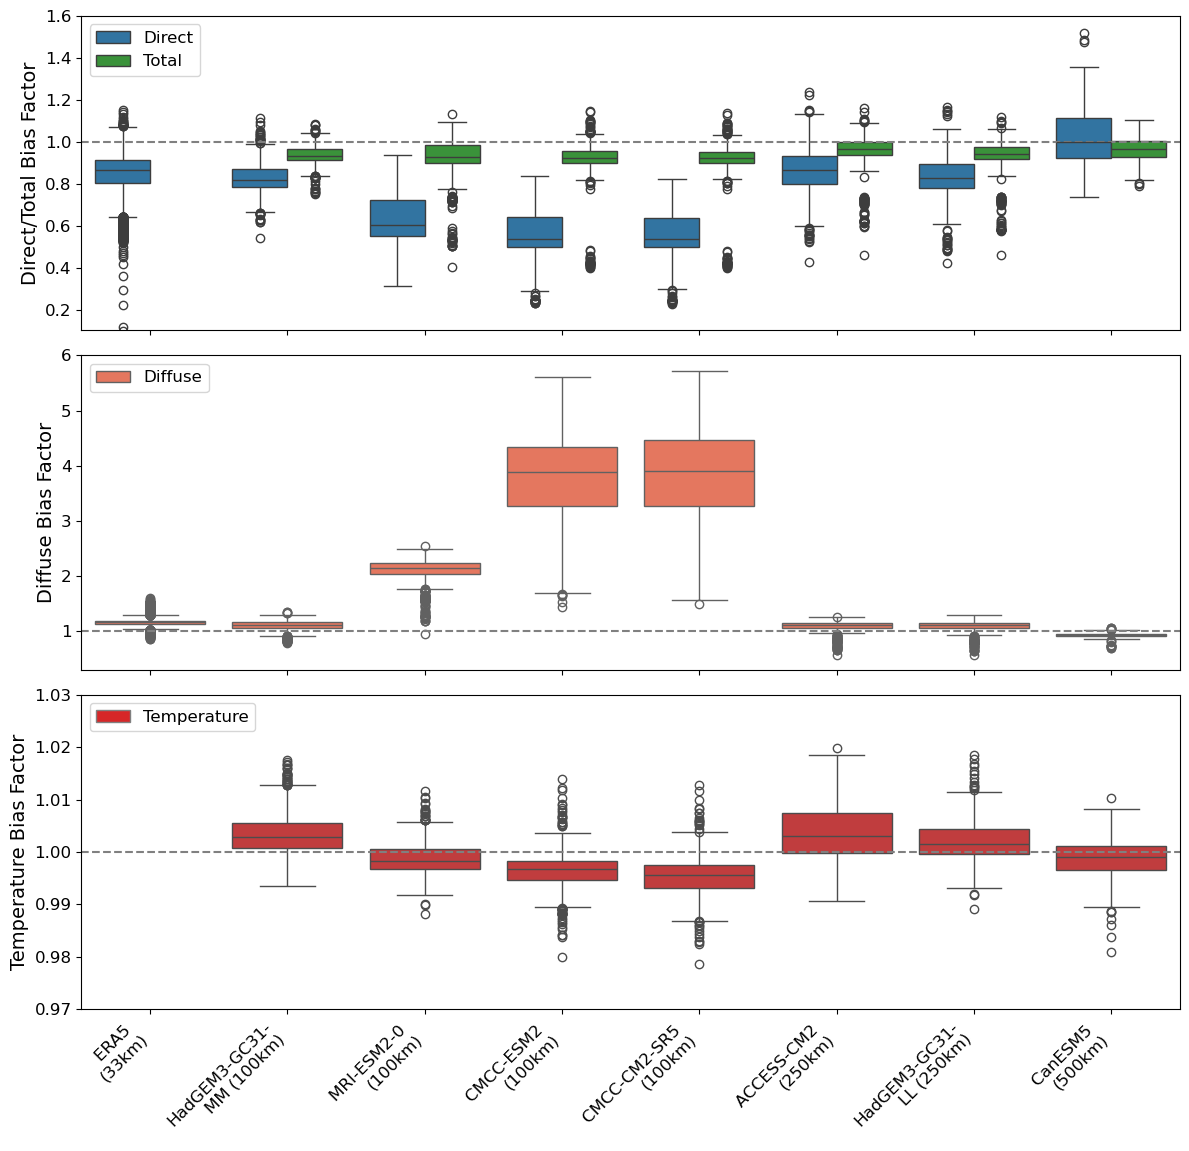

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import os
import glob
import xarray as xr
import pandas as pd
import numpy as np

# ─── SETTINGS ─────────────────────────────────────────────────────
base_dir = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors"

variables_era5 = ["influx_direct", "influx_diffuse"]
variables_model = ["direct", "diffuse", "total", "temp"]

model_labels = {
    "ERA5":                "ERA5 \n(33km)", 
    "HadGEM3-GC31-MM":     "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0":          "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2":           "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5":        "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2":          "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL":     "HadGEM3-GC31-\nLL (250km)",
    "CanESM5":             "CanESM5 \n(500km)",
}

model_order = [
    "ERA5 \n(33km)",
    "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-\nLL (250km)",
    "CanESM5 \n(500km)"
]
viridis = get_cmap('Reds')
red_from_viridis = viridis(0.5) 
red_hex = '#{:02x}{:02x}{:02x}'.format(int(red_from_viridis[0] * 255),
                                       int(red_from_viridis[1] * 255),
                                       int(red_from_viridis[2] * 255))
palette = {
    "Direct":  "#1f77b4",  # blue
    "Diffuse": red_hex,  # orange
    "Total":   "#2ca02c",  # green
    "Temperature": "#d62728"  # red
}

# ─── READ & MELT ───────────────────────────────────────────────────
records = []

# ERA5 data
for var in variables_era5:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_Era5.nc")
    for fpath in glob.glob(pattern):
        ds = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      "ERA5",
            "Variable":   var.replace("influx_", "").capitalize(),
            "BiasFactor": arr
        }))

# Model data
for var in variables_model:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_*.nc")
    for fpath in glob.glob(pattern):
        model = os.path.basename(fpath).split(f"{var}_bias_factor_")[1].replace(".nc", "")
        ds = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      model,
            "Variable":   var.capitalize(),
            "BiasFactor": arr
        }))

df = pd.concat(records, ignore_index=True)

# Map raw names → labels with resolution
df["ModelLabel"] = df["Model"].map(model_labels)
df["ModelLabel"] = pd.Categorical(df["ModelLabel"], categories=model_order, ordered=True)

# ─── PLOT ────────────────────────────────────────────────────────
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})

# Top: Direct & Total
sns.boxplot(data=df[df.Variable.isin(["Direct", "Total"])], 
            x="ModelLabel", y="BiasFactor", hue="Variable", 
            palette=["#1f77b4", "#2ca02c"], ax=ax1, order=model_order)
ax1.set_ylim(0.1, 1.6)
ax1.axhline(1, ls="--", c="gray")
ax1.set_ylabel("Direct/Total Bias Factor", fontsize=14)
ax1.legend(loc="upper left", fontsize=12, title=None)  # Removed title

# Middle: Diffuse
sns.boxplot(data=df[df.Variable == "Diffuse"], 
            x="ModelLabel", y="BiasFactor", hue="Variable", 
            palette=[red_hex], ax=ax2, order=model_order)
ax2.set_ylim(0.3, 6)
ax2.axhline(1, ls="--", c="gray")
ax2.set_ylabel("Diffuse Bias Factor", fontsize=14)
ax2.legend(loc="upper left", fontsize=12, title=None)  # Removed title

# Bottom: Temperature
sns.boxplot(data=df[df.Variable == "Temp"], 
            x="ModelLabel", y="BiasFactor", palette=["#d62728"], ax=ax3, order=model_order)
ax3.set_ylim(0.97, df[df.Variable == "Temp"]["BiasFactor"].max()*1.01)
ax3.axhline(1, ls="--", c="gray")
ax3.set_ylabel("Temperature Bias Factor", fontsize=14)
legend_label = Patch(facecolor='#d62728', edgecolor='gray', linewidth=1, label='Temperature')
ax3.legend(handles=[legend_label], loc="upper left", fontsize=12, title=None)  # Removed title

# Adjust layout
ax3.set_xlabel("", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
ax1.tick_params(axis="y", labelsize=12)
ax2.tick_params(axis="y", labelsize=12)
ax3.tick_params(axis="y", labelsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/merged_bias_factors.pdf", bbox_inches="tight", dpi=300)
plt.show()

/tmp/ipykernel_108626/1485862804.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('Reds')
/tmp/ipykernel_108626/1485862804.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df.Variable == "Temp"],
/tmp/ipykernel_108626/1485862804.py:107: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df[df.Variable == "Temp"],


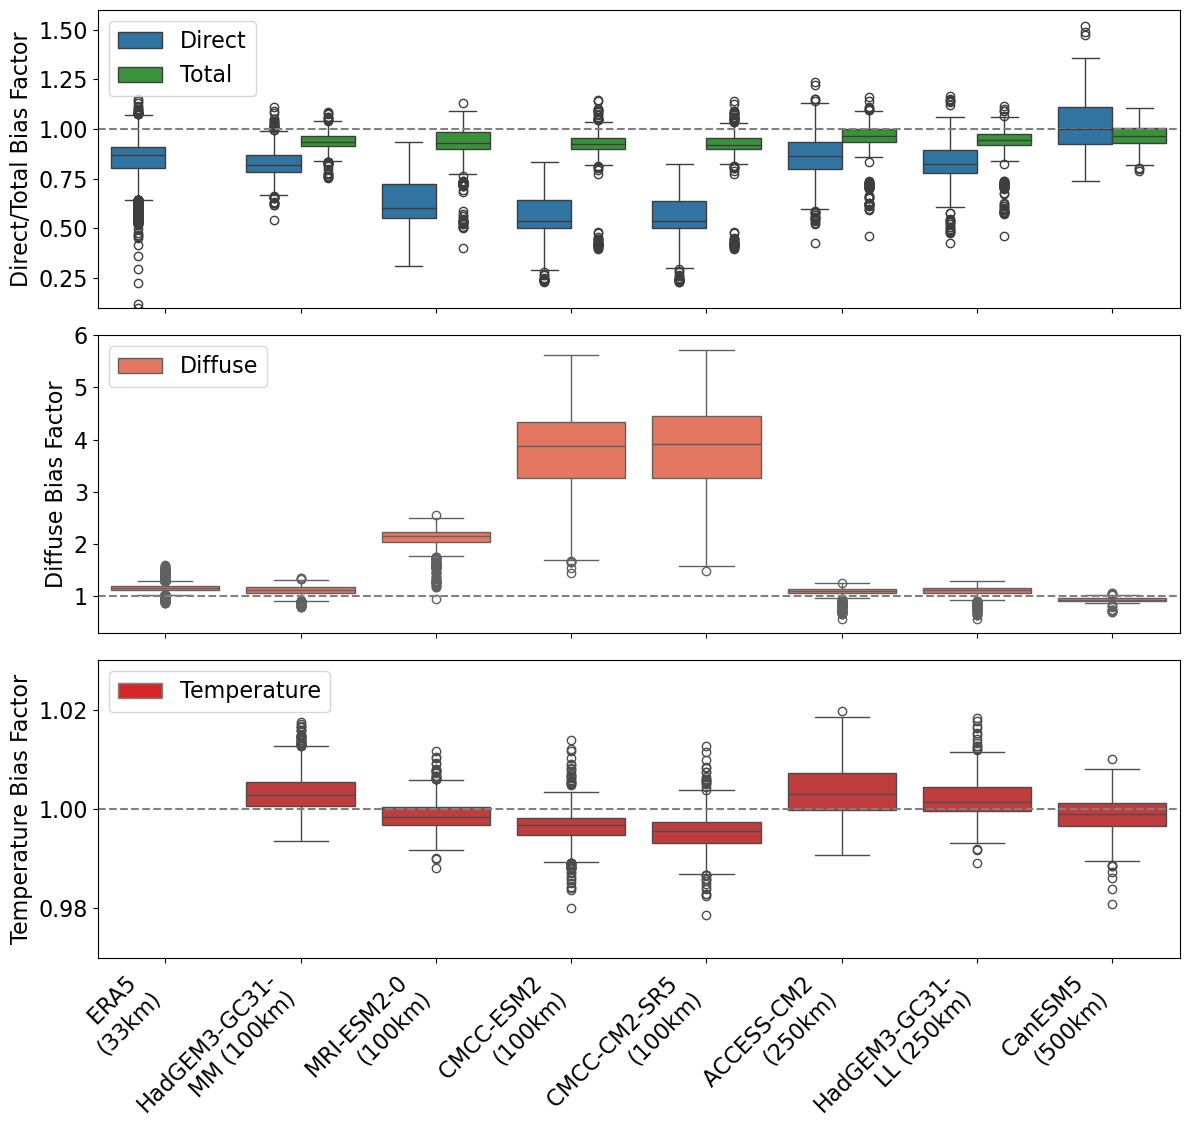

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import os
import glob
import xarray as xr
import pandas as pd
import numpy as np

# ─── SETTINGS ─────────────────────────────────────────────────────
base_dir = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors"

variables_era5 = ["influx_direct", "influx_diffuse"]
variables_model = ["direct", "diffuse", "total", "temp"]

model_labels = {
    "ERA5":                "ERA5 \n(33km)", 
    "HadGEM3-GC31-MM":     "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0":          "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2":           "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5":        "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2":          "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL":     "HadGEM3-GC31-\nLL (250km)",
    "CanESM5":             "CanESM5 \n(500km)",
}

model_order = [
    "ERA5 \n(33km)",
    "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-\nLL (250km)",
    "CanESM5 \n(500km)"
]
viridis = get_cmap('Reds')
red_from_viridis = viridis(0.5) 
red_hex = '#{:02x}{:02x}{:02x}'.format(int(red_from_viridis[0] * 255),
                                       int(red_from_viridis[1] * 255),
                                       int(red_from_viridis[2] * 255))
palette = {
    "Direct":  "#1f77b4",  # blue
    "Diffuse": red_hex,  # orange
    "Total":   "#2ca02c",  # green
    "Temperature": "#d62728"  # red
}

# ─── READ & MELT ───────────────────────────────────────────────────
records = []

# ERA5 data
for var in variables_era5:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_Era5.nc")
    for fpath in glob.glob(pattern):
        ds = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      "ERA5",
            "Variable":   var.replace("influx_", "").capitalize(),
            "BiasFactor": arr
        }))

# Model data
for var in variables_model:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_*.nc")
    for fpath in glob.glob(pattern):
        model = os.path.basename(fpath).split(f"{var}_bias_factor_")[1].replace(".nc", "")
        ds = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      model,
            "Variable":   var.capitalize(),
            "BiasFactor": arr
        }))

df = pd.concat(records, ignore_index=True)

# Map raw names → labels with resolution
df["ModelLabel"] = df["Model"].map(model_labels)
df["ModelLabel"] = pd.Categorical(df["ModelLabel"], categories=model_order, ordered=True)

# ─── PLOT ────────────────────────────────────────────────────────
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})

# Top: Direct & Total
sns.boxplot(data=df[df.Variable.isin(["Direct", "Total"])], 
            x="ModelLabel", y="BiasFactor", hue="Variable", 
            palette=["#1f77b4", "#2ca02c"], ax=ax1, order=model_order)
ax1.set_ylim(0.1, 1.6)
ax1.axhline(1, ls="--", c="gray")
ax1.set_ylabel("Direct/Total Bias Factor", fontsize=16)
ax1.legend(loc="upper left", fontsize=16, title=None)  # Removed title

# Middle: Diffuse
sns.boxplot(data=df[df.Variable == "Diffuse"], 
            x="ModelLabel", y="BiasFactor", hue="Variable", 
            palette=[red_hex], ax=ax2, order=model_order)
ax2.set_ylim(0.3, 6)
ax2.axhline(1, ls="--", c="gray")
ax2.set_ylabel("Diffuse Bias Factor", fontsize=16)
ax2.legend(loc="upper left", fontsize=16, title=None)  # Removed title

# Bottom: Temperature
sns.boxplot(data=df[df.Variable == "Temp"], 
            x="ModelLabel", y="BiasFactor", palette=["#d62728"], ax=ax3, order=model_order)
ax3.set_ylim(0.97, df[df.Variable == "Temp"]["BiasFactor"].max()*1.01)
ax3.axhline(1, ls="--", c="gray")
ax3.set_ylabel("Temperature Bias Factor", fontsize=16)
legend_label = Patch(facecolor='#d62728', edgecolor='gray', linewidth=1, label='Temperature')
ax3.legend(handles=[legend_label], loc="upper left", fontsize=16, title=None)  # Removed title

# Adjust layout
ax3.set_xlabel("", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)
ax3.tick_params(axis="y", labelsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/merged_bias_factors.pdf", bbox_inches="tight", dpi=300)
plt.show()

/tmp/ipykernel_108626/2376735832.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = get_cmap('Reds')
/tmp/ipykernel_108626/2376735832.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df.Variable == "Temp"],
/tmp/ipykernel_108626/2376735832.py:107: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df[df.Variable == "Temp"],


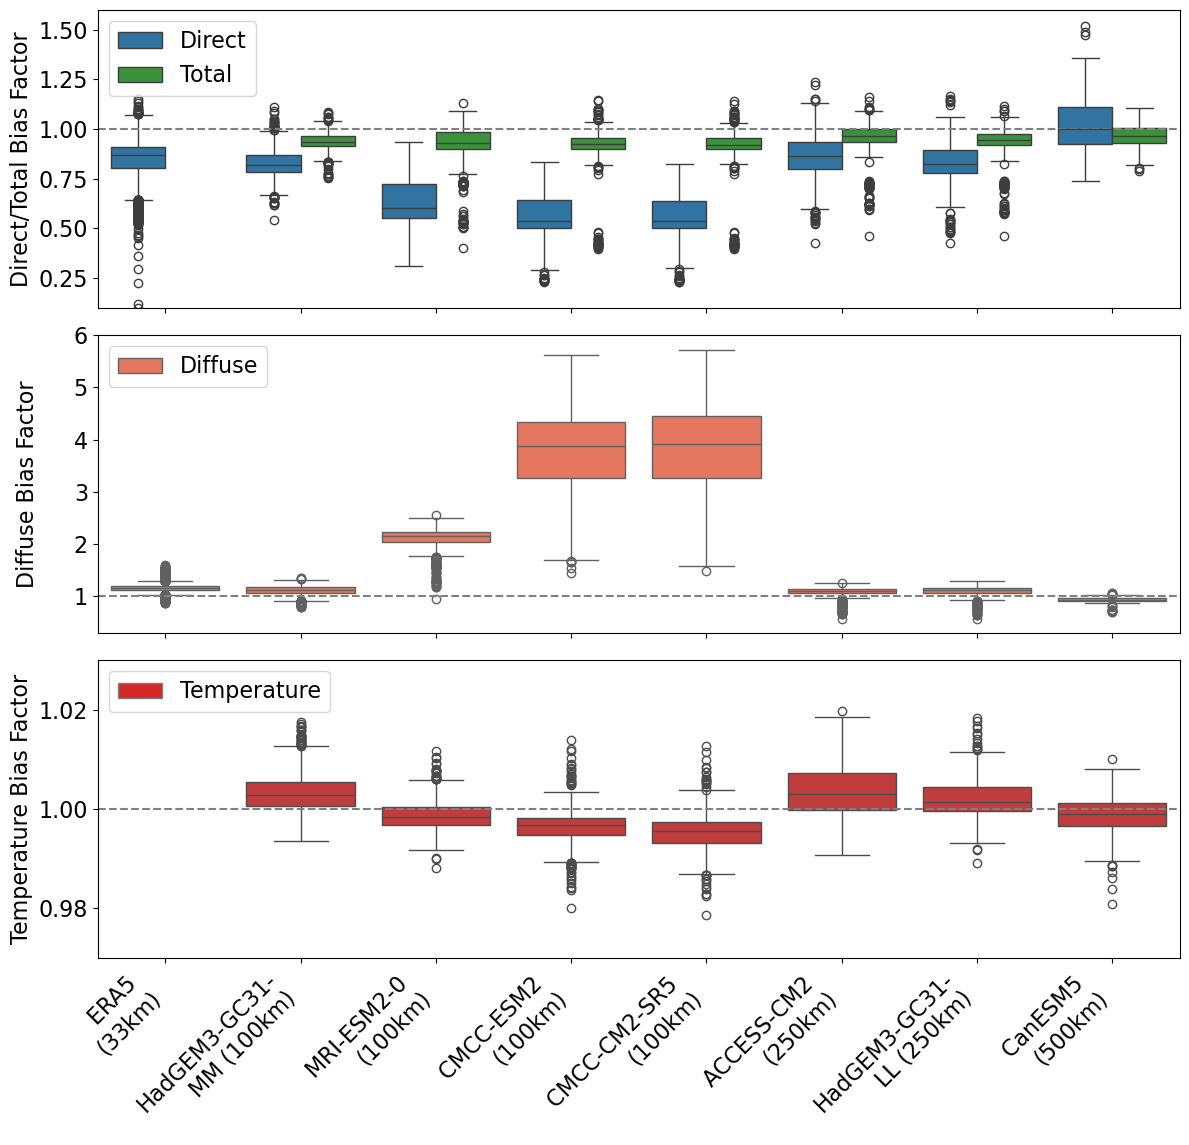

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import os
import glob
import xarray as xr
import pandas as pd
import numpy as np

# ─── SETTINGS ─────────────────────────────────────────────────────
base_dir = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/bias_factors"

variables_era5 = ["influx_direct", "influx_diffuse"]
variables_model = ["direct", "diffuse", "total", "temp"]

model_labels = {
    "ERA5":                "ERA5 \n(33km)", 
    "HadGEM3-GC31-MM":     "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0":          "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2":           "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5":        "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2":          "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-LL":     "HadGEM3-GC31-\nLL (250km)",
    "CanESM5":             "CanESM5 \n(500km)",
}

model_order = [
    "ERA5 \n(33km)",
    "HadGEM3-GC31-\nMM (100km)",
    "MRI-ESM2-0 \n(100km)",
    "CMCC-ESM2 \n(100km)",
    "CMCC-CM2-SR5 \n(100km)",
    "ACCESS-CM2 \n(250km)",
    "HadGEM3-GC31-\nLL (250km)",
    "CanESM5 \n(500km)"
]
viridis = get_cmap('Reds')
red_from_viridis = viridis(0.5) 
red_hex = '#{:02x}{:02x}{:02x}'.format(int(red_from_viridis[0] * 255),
                                       int(red_from_viridis[1] * 255),
                                       int(red_from_viridis[2] * 255))
palette = {
    "Direct":  "#1f77b4",  # blue
    "Diffuse": red_hex,  # orange
    "Total":   "#2ca02c",  # green
    "Temperature": "#d62728"  # red
}

# ─── READ & MELT ───────────────────────────────────────────────────
records = []

# ERA5 data
for var in variables_era5:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_Era5.nc")
    for fpath in glob.glob(pattern):
        ds = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      "ERA5",
            "Variable":   var.replace("influx_", "").capitalize(),
            "BiasFactor": arr
        }))

# Model data
for var in variables_model:
    pattern = os.path.join(base_dir, f"{var}_bias_factor_*.nc")
    for fpath in glob.glob(pattern):
        model = os.path.basename(fpath).split(f"{var}_bias_factor_")[1].replace(".nc", "")
        ds = xr.open_dataset(fpath)
        arr = ds["bias_factor"].values.ravel()
        arr = arr[~np.isnan(arr)]
        records.append(pd.DataFrame({
            "Model":      model,
            "Variable":   var.capitalize(),
            "BiasFactor": arr
        }))

df = pd.concat(records, ignore_index=True)

# Map raw names → labels with resolution
df["ModelLabel"] = df["Model"].map(model_labels)
df["ModelLabel"] = pd.Categorical(df["ModelLabel"], categories=model_order, ordered=True)

# ─── PLOT ────────────────────────────────────────────────────────
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})

# Top: Direct & Total
sns.boxplot(data=df[df.Variable.isin(["Direct", "Total"])], 
            x="ModelLabel", y="BiasFactor", hue="Variable", 
            palette=["#1f77b4", "#2ca02c"], ax=ax1, order=model_order)
ax1.set_ylim(0.1, 1.6)
ax1.axhline(1, ls="--", c="gray")
ax1.set_ylabel("Direct/Total Bias Factor", fontsize=16)
ax1.legend(loc="upper left", fontsize=16, title=None)  # Removed title

# Middle: Diffuse
sns.boxplot(data=df[df.Variable == "Diffuse"], 
            x="ModelLabel", y="BiasFactor", hue="Variable", 
            palette=[red_hex], ax=ax2, order=model_order)
ax2.set_ylim(0.3, 6)
ax2.axhline(1, ls="--", c="gray")
ax2.set_ylabel("Diffuse Bias Factor", fontsize=16, labelpad=25)  # Adjusted label padding
ax2.legend(loc="upper left", fontsize=16, title=None)  # Removed title

# Bottom: Temperature
sns.boxplot(data=df[df.Variable == "Temp"], 
            x="ModelLabel", y="BiasFactor", palette=["#d62728"], ax=ax3, order=model_order)
ax3.set_ylim(0.97, df[df.Variable == "Temp"]["BiasFactor"].max()*1.01)
ax3.axhline(1, ls="--", c="gray")
ax3.set_ylabel("Temperature Bias Factor", fontsize=16)
legend_label = Patch(facecolor='#d62728', edgecolor='gray', linewidth=1, label='Temperature')
ax3.legend(handles=[legend_label], loc="upper left", fontsize=16, title=None)  # Removed title

# Adjust layout
ax3.set_xlabel("", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)
ax3.tick_params(axis="y", labelsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/merged_bias_factors.pdf", bbox_inches="tight", dpi=300)
plt.show()